#  Aviation Accident Database analysis

### To begin we need to first import libraries and define functions for plotting the data using matplotlib

In [365]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

### Read Data

In [366]:
df = pd.read_csv('../archive/AviationData.csv', encoding = 'latin1')
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


## Statistical Summary

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [368]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


In [369]:
df.describe(include=object)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Amateur.Built,Engine.Type,FAR.Description,Schedule,Purpose.of.flight,Air.carrier,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
count,88889,88889,88889,88889,88837,88663,34382,34373,50132,52704,...,88787,81793,32023,12582,82697,16648,84397,61724,82505,75118
unique,87951,2,88863,14782,27758,219,25592,27156,10374,24870,...,2,12,31,3,26,13590,4,12,17074,2924
top,20001212X19172,Accident,CEN22LA149,1984-06-30,"ANCHORAGE, AK",United States,332739N,0112457W,NONE,Private,...,No,Reciprocating,091,NSCH,Personal,Pilot,VMC,Landing,Probable Cause,25-09-2020
freq,3,85015,2,25,434,82248,19,24,1488,240,...,80312,69530,18221,4474,49448,258,77303,15428,61754,17019


# Data Cleaning

### Drop columns 

In [370]:
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [371]:
df.duplicated().sum()

0

In [372]:
df.keys()

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

In [373]:
df = df.drop(columns=['Latitude'])
df = df.drop(columns=['Longitude'])
df = df.drop(columns=['Airport.Code'])
df = df.drop(columns=['Total.Minor.Injuries'])
df = df.drop(columns=['Total.Fatal.Injuries'])
df = df.drop(columns=['Total.Serious.Injuries'])
df = df.drop(columns=['Publication.Date'])
df = df.drop(columns=['Accident.Number'])
df = df.drop(columns=['Registration.Number'])
df = df.drop(columns=['Schedule'])
df = df.drop(columns=['FAR.Description'])
df = df.drop(columns=['Airport.Name'])

In [375]:
#Choose records only for United States
df = df[df['Country'] == 'United States']
df['Country'].value_counts()

Country
United States    82226
Name: count, dtype: int64

In [376]:
#Choose only Airplanes as an Aircraft Category
df = df[df['Aircraft.Category'] == 'Airplane']
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane    24227
Name: count, dtype: int64

In [389]:
#Convert Date to a datetime, add a Month column 
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df['Month'] = df['Event.Date'].dt.month
df['Year'] = df['Event.Date'].dt.year

In [378]:
#Merge weather condition unknowns
df['Weather.Condition'].replace(to_replace = ['Unk', 'UNK'], value = 'Unknown', inplace = True, regex = False)
df['Weather.Condition'].value_counts()

Weather.Condition
VMC        22315
IMC         1296
Unknown      169
Name: count, dtype: int64

In [387]:
#Merge Injuries types togethe
df['Injuried'] = df['Injury.Severity'].str.split('(').str[0]
df['Injuried'].value_counts()

Injuried
Non-Fatal    19864
Fatal         3845
Incident       167
Minor          156
Serious        114
Name: count, dtype: int64

In [380]:
# Merge same Air carrier names togheter
df['Air.carrier'] = df['Air.carrier'].replace("DELTA AIR LINES INC", "Delta Air Lines")
df['Air.carrier'] = df['Air.carrier'].replace("AMERICAN AIRLINES INC", "American Airlines")
df['Air.carrier'] = df['Air.carrier'].replace("SOUTHWEST AIRLINES CO", "Southwest Airlines")
df['Air.carrier'] = df['Air.carrier'].replace("UNITED AIR LINES INC", "United Airlines")
df['Air.carrier'] = df['Air.carrier'].replace("United Airlines|", "United Airlines")
df['Air.carrier'] = df['Air.carrier'].replace("CIVIL AIR PATROL", "CIVIL AIR PATROL INC")
df['Air.carrier'] = df['Air.carrier'].str.lower().str.title()
df['Air.carrier'].value_counts().head(20)

Air.carrier
Pilot                          225
Southwest Airlines              62
Delta Air Lines                 54
American Airlines               48
United Airlines                 41
On File                         25
Private Individual              22
Civil Air Patrol Inc            22
Skywest Airlines Inc            15
Us Airways Inc                  12
University Of North Dakota      11
Transpac Aviation Academy       10
Us Aviation Group Llc           10
Und Aerospace Foundation        10
Grant Aviation Inc               9
Air Canada                       9
American Eagle Airlines Inc      9
Hageland Aviation                8
Falcon Aviation Academy          7
Christiansen Aviation Inc        7
Name: count, dtype: int64

Report Status Data Cleaning

In [381]:
# Merge same Report status togheter
df['Report.Status'] = df['Report.Status'].replace("The pilot's failure to maintain directional control during the landing roll.", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace('A loss of engine power for undetermined reasons.', 'A total loss of engine power for undetermined reasons.')
df['Report.Status'] = df['Report.Status'].replace('A total loss of engine power for undetermined reasons.', 'The loss of engine power for undetermined reasons.')
df['Report.Status'] = df['Report.Status'].replace("The pilots failure to maintain directional control during the landing roll.\r\n\r", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace("The pilots failure to maintain directional control during the landing roll.", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace("The pilot's failure to maintain directional control of the airplane during landing.", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace("The pilots failure to maintain directional control during landing.", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace("The pilot's failure to maintain directional control during the takeoff roll.", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace("The pilots failure to maintain directional control during landing.\r\n\r", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace("The pilot's failure to maintain directional control while landing.", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'] = df['Report.Status'].replace('A loss of engine power for undetermined reasons.', 'A total loss of engine power for undetermined reasons.')
df['Report.Status'] = df['Report.Status'].replace("The pilot's loss of directional control during landing.  ", "The pilot's failure to maintain directional control during landing.")
df['Report.Status'].value_counts().head()


Report.Status
Probable Cause                                                         6386
The pilot's failure to maintain directional control during landing.     207
The loss of engine power for undetermined reasons.                      115
The pilot's improper recovery from a bounced landing.                    19
The pilot's failure to maintain directional control during takeoff.      17
Name: count, dtype: int64

Make Data Cleaning

In [382]:
#Merge different capitalizations of Make togheter
df['Make'] = df['Make'].str.title()
df['Make'].value_counts()

Make
Cessna             7724
Piper              4336
Beech              1528
Boeing              455
Mooney              393
                   ... 
Easler Kelly          1
Mathews               1
Schaefer              1
Allen Raymond H       1
Orlican S R O         1
Name: count, Length: 3404, dtype: int64

Injury Severity Data Cleaning

In [383]:
#Split location in city and state
df['City'] = df['Location'].str.split(',').str[0]
df['State'] = df['Location'].str.split(',').str[1]
df[['City', 'State']].head(10)

,City,State
5,BOSTON,MA
7,PULLMAN,WA
8,EAST HANOVER,NJ
12,HOMER,LA
13,HEARNE,TX
14,CHICKASHA,OK
15,LITTLE ROCK,AR
17,SKWENTA,AK
18,GALETON,PA
20,YPSILANTI,MI


## Data Exploration

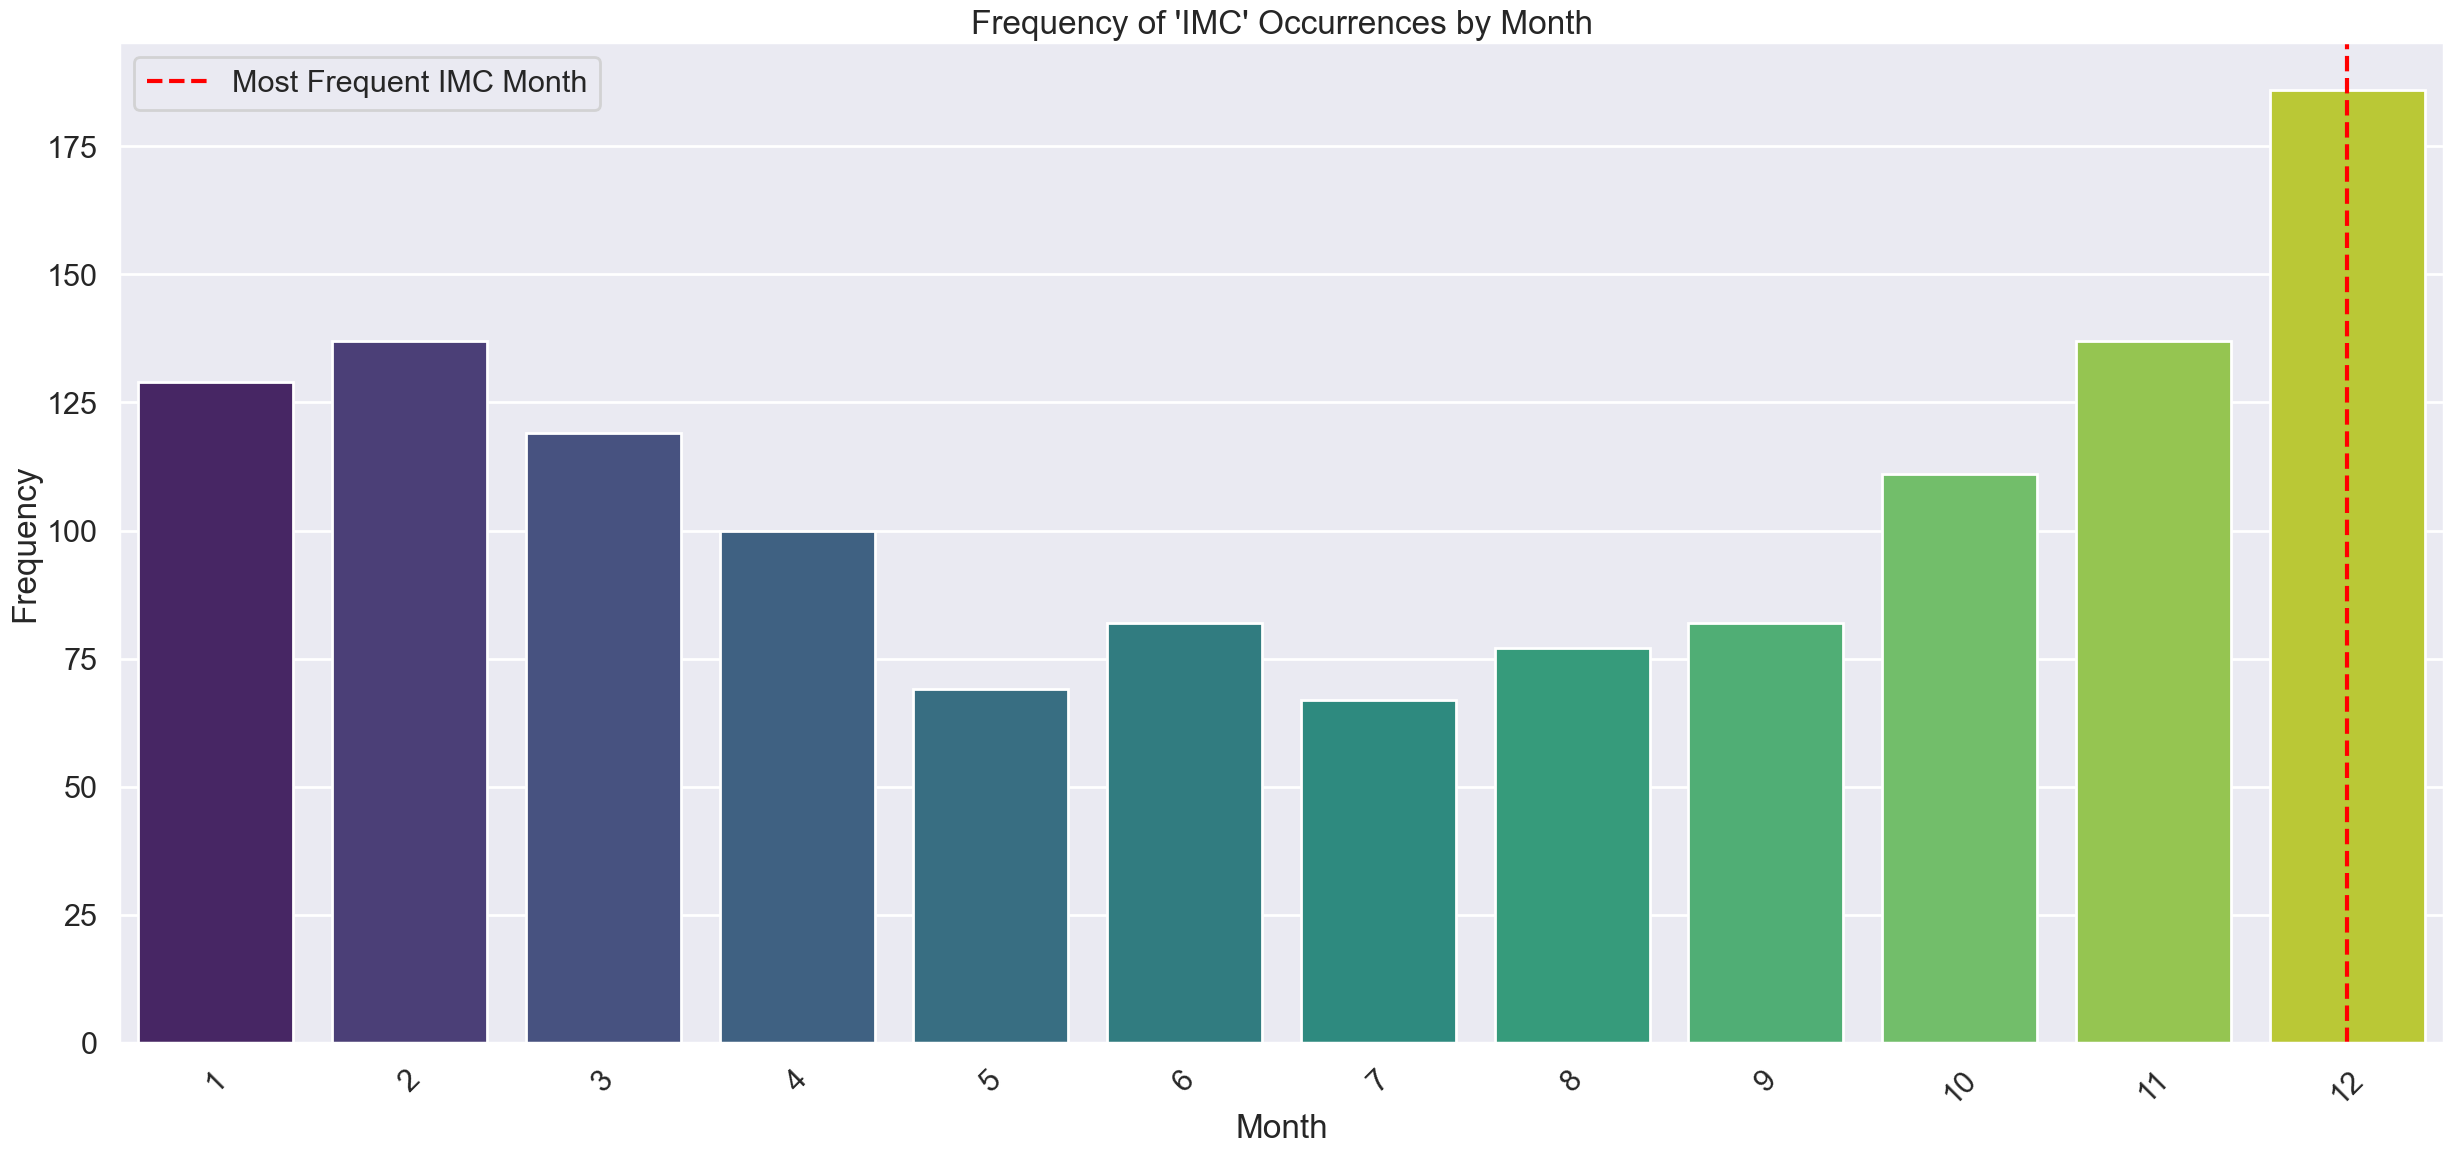

In [398]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'Event.Date' column to datetime format
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the month from the 'Event.Date' column
df['Month'] = df['Event.Date'].dt.month

# Filter the DataFrame for 'IMC' values
imc_filtered_df = df[df['Weather.Condition'] == 'IMC']

# Calculate the frequency of 'IMC' occurrences in each month
imc_month_frequencies = imc_filtered_df['Month'].value_counts()

# Find the most frequent month
most_frequent_imc_month = imc_month_frequencies.idxmax()
plt.figure(figsize=(30,13))
sns.barplot(x=imc_month_frequencies.index, y=imc_month_frequencies.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Frequency of 'IMC' Occurrences by Month")
plt.xticks(rotation=45)
plt.axvline(x=most_frequent_imc_month-1, color='red', linestyle='--', label='Most Frequent IMC Month')
plt.legend()
plt.show()

In [397]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
# Extract the month from the 'Event.Date' column
df['Month'] = df['Event.Date'].dt.month

# Calculate the frequency of events in each month
month_frequencies = df['Month'].value_counts()

# Find the most frequent month
most_frequent_month = month_frequencies.idxmax()
most_frequent_month_occurrences = month_frequencies[most_frequent_month]

# Create a bar plot
plt.figure(figsize=(10, 6),figsize=(30,13))
sns.barplot(x=month_frequencies.index, y=month_frequencies.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Frequency of Events by Month")
plt.xticks(rotation=45)

# Highlight the most frequent month
plt.axvline(x=most_frequent_month -1, color='red', linestyle='--', label='Most Frequent Month')
plt.text(most_frequent_month + 0.1, most_frequent_month_occurrences + 10,
         f"Most Frequent Month: {most_frequent_month}", color='red')

plt.legend()
plt.show()





SyntaxError: keyword argument repeated: figsize (935581260.py, line 13)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


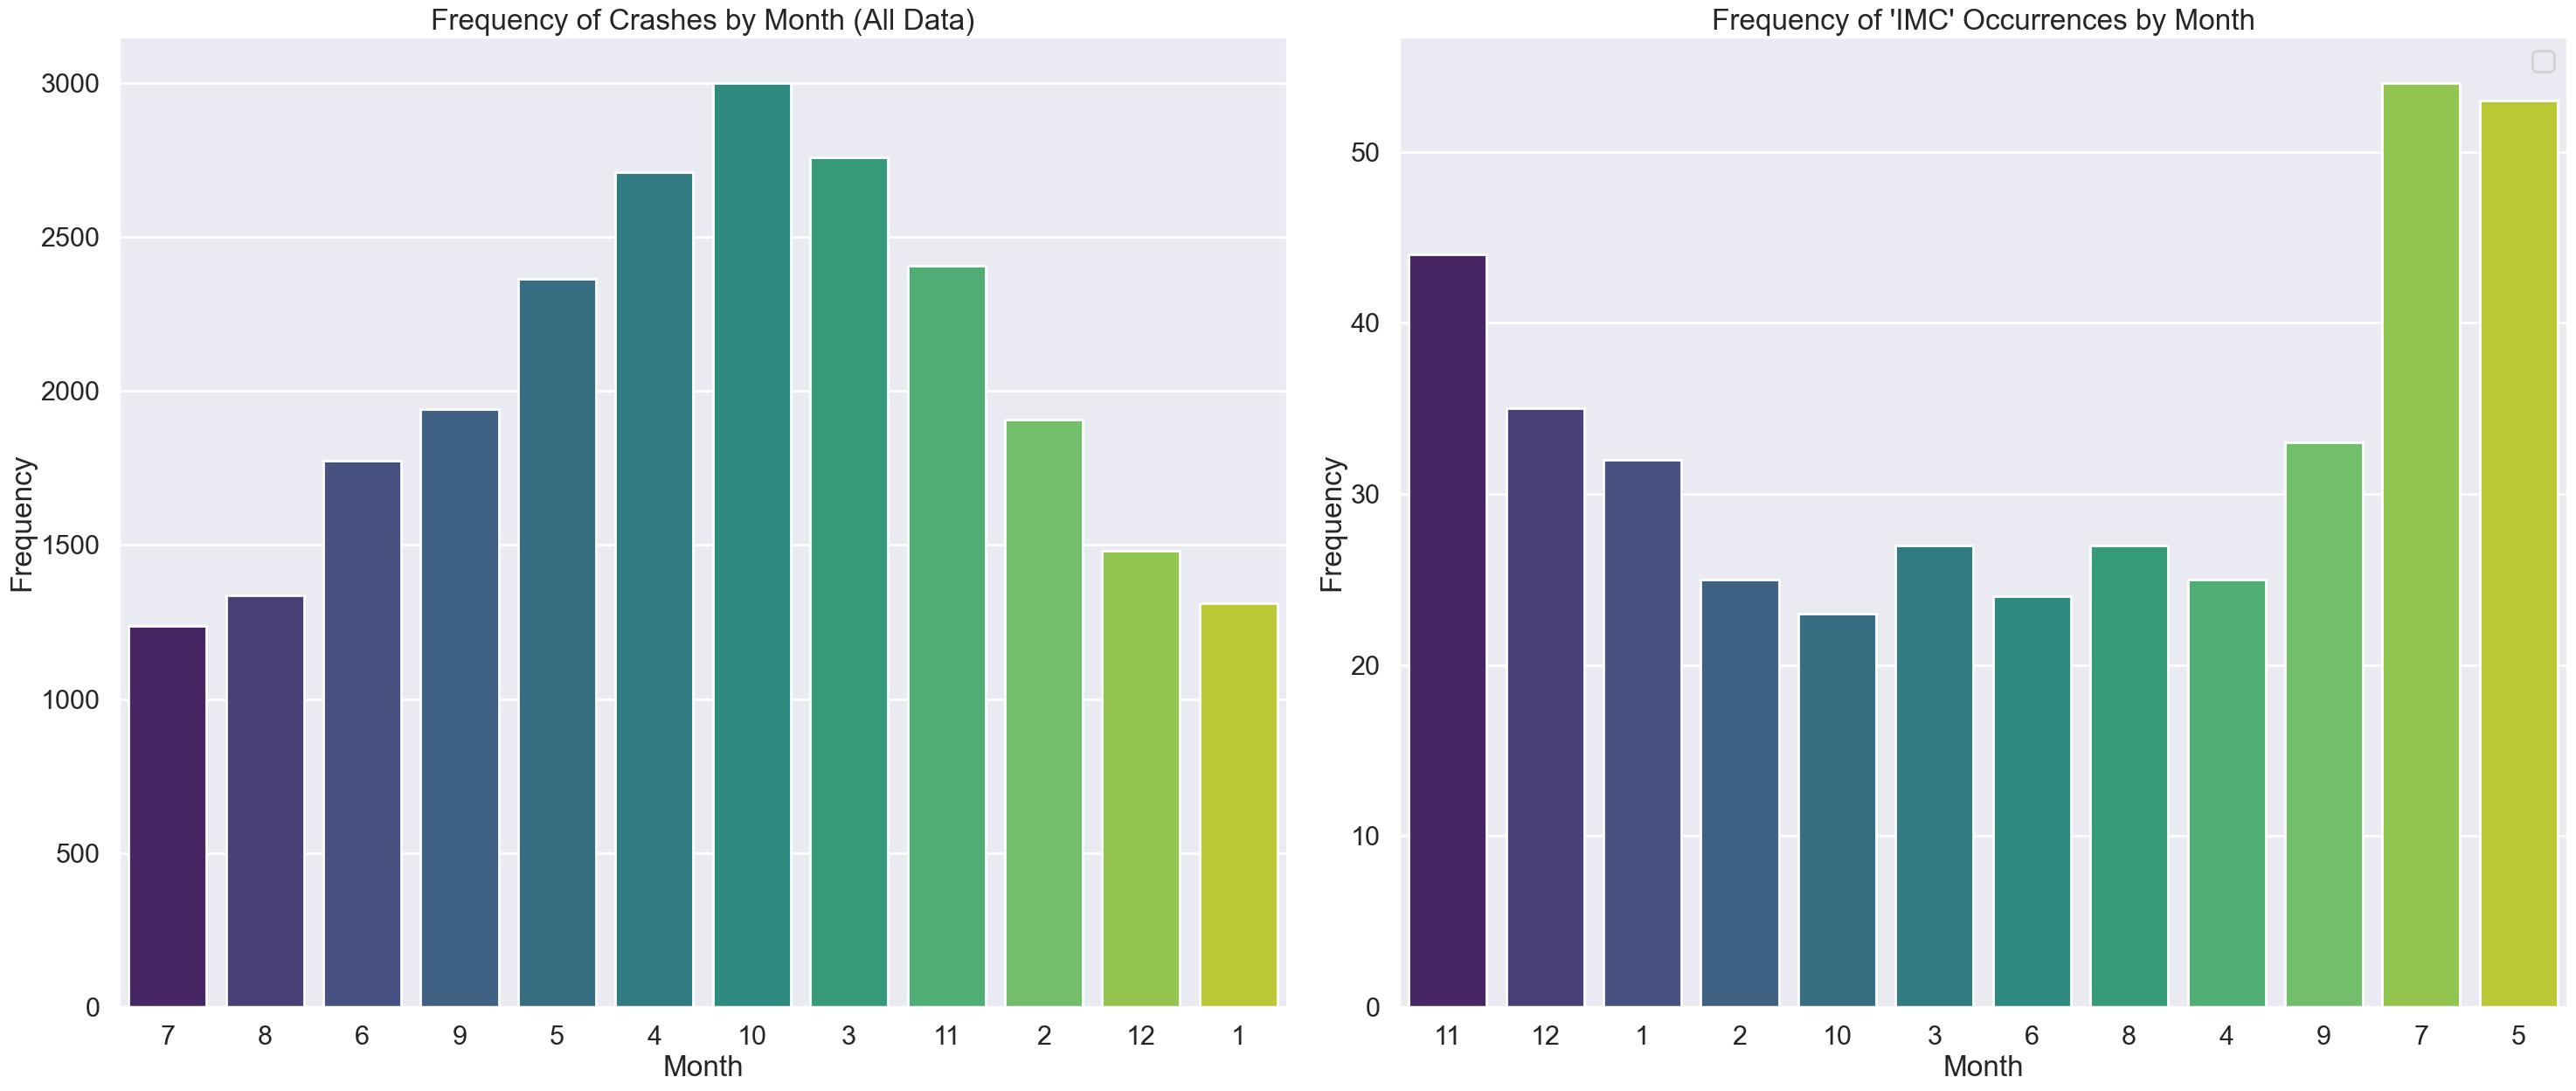

In [396]:
# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(30,13))
month_frequencies = df['Month'].value_counts()

# Plot the first graph
axes[0].set_title("Frequency of Crashes by Month (All Data)")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Frequency")
sns.barplot(x=month_frequencies.index, y=month_frequencies.values, palette="viridis", ax=axes[0])
axes[0].set_xticklabels(month_frequencies.index, rotation=0)

month_badfrequencies = bad_weather_df['Month'].value_counts()

# Plot the second graph
axes[1].set_title("Frequency of 'IMC' Occurrences by Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Frequency")
sns.barplot(x=month_badfrequencies.index, y=month_badfrequencies.values, palette="viridis", ax=axes[1])
axes[1].set_xticklabels(month_badfrequencies.index, rotation=0)
            
axes[1].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()

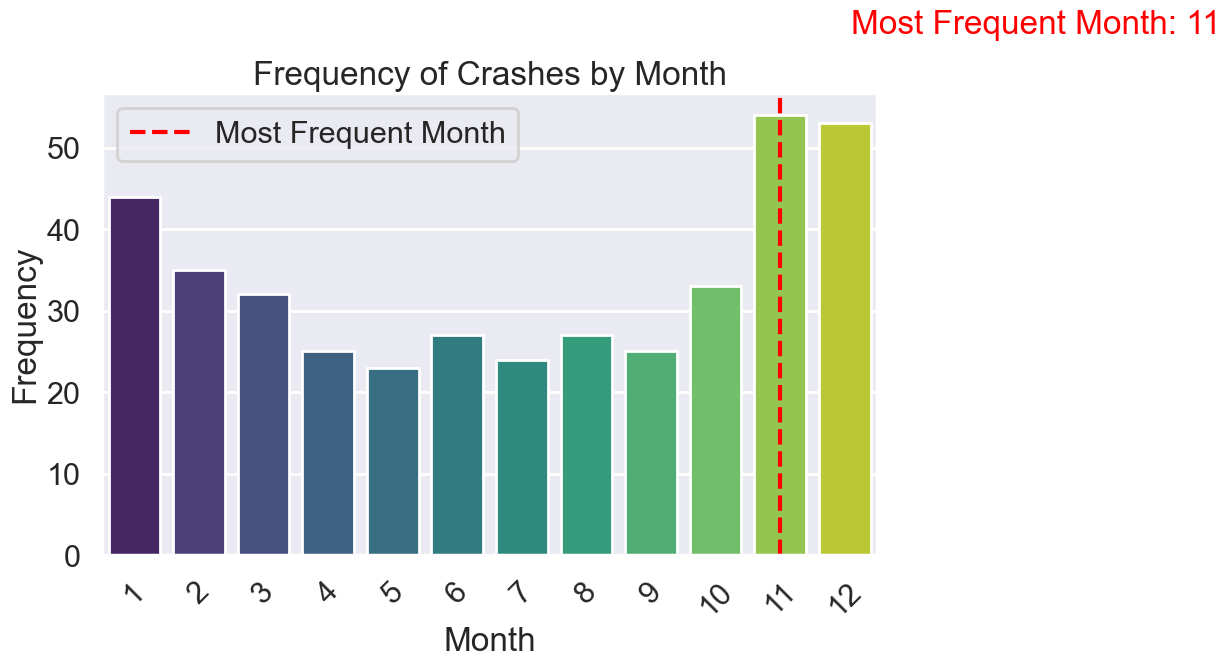

In [255]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])

# Extract the month from the 'Event.Date' column
bad_weather_df['Month'] = bad_weather_df['Event.Date'].dt.month

# Calculate the frequency of events in each month
month_frequencies = bad_weather_df['Month'].value_counts()

# Find the most frequent month
most_frequent_month = month_frequencies.idxmax()
most_frequent_month_occurrences = month_frequencies[most_frequent_month]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=month_frequencies.index, y=month_frequencies.values, palette="viridis")
plt.xlabel("Month")
plt.ylabel("Frequency")
plt.title("Frequency of Events by Month")
plt.xticks(rotation=45)

# Highlight the most frequent month
plt.axvline(x=most_frequent_month -1, color='red', linestyle='--', label='Most Frequent Month')
plt.text(most_frequent_month + 0.1, most_frequent_month_occurrences + 10,
         f"Most Frequent Month: {most_frequent_month}", color='red')

plt.legend()
plt.show()

In [256]:
df['Model'].value_counts()
top_20_models = df['Model'].value_counts().head(20)
print(top_20_models)

Model
172          772
152          427
172N         305
182          289
172S         273
180          235
PA28         232
150          224
PA-28-140    221
SR22         220
172M         211
PA-18-150    202
A36          191
172P         165
PA-28-161    139
140          132
PA-28-180    128
170B         122
7AC          112
PA-28-181    110
Name: count, dtype: int64


In [257]:
df['Make'] = df['Make'].str.lower().str.title()
df['Make'] = df['Make'].replace("AIR TRACTOR INC", "Air Tractor")
df['Make'] = df['Make'].replace("Aviat", "Aviat Aircraft Inc")
df['Make'] = df['Make'].replace("Cirrus", "Cirrus Design Corp")
df['Make'] = df['Make'].replace("Grumman Acft Eng Cor-Schweizer", "Grumman")
df['Make'] = df['Make'].replace("Cirrus Design Corp", "Cirrus Design Corp")
df['Make'] = df['Make'].replace("Air Tractor Inc", "Air Tractor")


In [258]:
df['Make'].value_counts()
top_20_models = df['Make'].value_counts().head(20)
print(top_20_models)

Make
Cessna                7725
Piper                 4336
Beech                 1528
Boeing                 456
Air Tractor            407
Mooney                 393
Cirrus Design Corp     296
Grumman                294
Bellanca               280
Aeronca                228
Maule                  225
Champion               165
Luscombe               163
Stinson                146
Aviat Aircraft Inc     144
North American         114
Taylorcraft            109
Vans                   108
Aero Commander          96
Dehavilland             92
Name: count, dtype: int64


In [259]:
df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Injured,Month
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,...,2.0,Turbo Fan,NaN,Air Canada,44.0,VMC,Climb,Probable Cause,NaN,9
7,20020909X01562,Accident,1982-01-01,"PULLMAN, WA",United States,Non-Fatal,Substantial,Airplane,Cessna,140,...,1.0,Reciprocating,Personal,NaN,2.0,VMC,Takeoff,Probable Cause,0.0,1
8,20020909X01561,Accident,1982-01-01,"EAST HANOVER, NJ",United States,Non-Fatal,Substantial,Airplane,Cessna,401B,...,2.0,Reciprocating,Business,NaN,2.0,IMC,Landing,Probable Cause,0.0,1
12,20020917X02148,Accident,1982-01-02,"HOMER, LA",United States,Non-Fatal,Destroyed,Airplane,Bellanca,17-30A,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Cruise,Probable Cause,1.0,1
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Takeoff,Probable Cause,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88869,20221213106455,Accident,2022-12-13,"Lewistown, MT",United States,Non-Fatal,Substantial,Airplane,Piper,PA42,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,12
88873,20221215106463,Accident,2022-12-14,"San Juan, PR",United States,Non-Fatal,Substantial,Airplane,Cirrus Design Corp,SR22,...,1.0,NaN,Personal,Sky West Aviation Inc Trustee,1.0,VMC,NaN,NaN,0.0,12
88876,20221219106475,Accident,2022-12-15,"Wichita, KS",United States,Non-Fatal,Substantial,Airplane,Swearingen,SA226TC,...,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,12
88877,20221219106470,Accident,2022-12-16,"Brooksville, FL",United States,Minor,Substantial,Airplane,Cessna,R172K,...,1.0,NaN,Personal,Gerber Richard E,0.0,VMC,NaN,NaN,1.0,12


In [260]:
df.keys()

Index(['Event.Id', 'Investigation.Type', 'Event.Date', 'Location', 'Country',
       'Injury.Severity', 'Aircraft.damage', 'Aircraft.Category', 'Make',
       'Model', 'Amateur.Built', 'Number.of.Engines', 'Engine.Type',
       'Purpose.of.flight', 'Air.carrier', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Injured', 'Month'],
      dtype='object')

New df with bad conditions

In [261]:
# creating new df with bad conditions
bad_weather_df = df[(df['Aircraft.damage'] == 'Destroyed') & (df['Injury.Severity'] == 'Fatal') & (df['Weather.Condition'] == 'IMC')]
bad_weather_df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Injured,Month
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Takeoff,Probable Cause,1.0,1
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Airplane,Navion,A,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Cruise,Probable Cause,1.0,1
15,20020917X02117,Accident,1982-01-02,"LITTLE ROCK, AR",United States,Fatal,Destroyed,Airplane,Beech,19,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Cruise,Probable Cause,2.0,1
24,20020917X02255,Accident,1982-01-03,"10 NM W LEE VIN, CA",United States,Fatal,Destroyed,Airplane,Grumman,AA-5B,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Descent,Probable Cause,3.0,1
26,20020917X01720,Accident,1982-01-03,"PINEHURST, NC",United States,Fatal,Destroyed,Airplane,Beechcraft,BE-58,...,2.0,Reciprocating,Personal,NaN,0.0,IMC,Approach,Probable Cause,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88562,20220923105990,Accident,2022-09-22,"Sisters, OR",United States,Fatal,Destroyed,Airplane,Piper,PA-28-140,...,1.0,NaN,Personal,NaN,0.0,IMC,NaN,NaN,1.0,9
88629,20221005106070,Accident,2022-10-05,"Arundel, ME",United States,Fatal,Destroyed,Airplane,Beech,A36,...,1.0,NaN,Business,Abet,0.0,IMC,NaN,NaN,2.0,10
88739,20221031106230,Accident,2022-10-31,"Alpharetta, GA",United States,Fatal,Destroyed,Airplane,Hawker Beechcraft,G58,...,2.0,NaN,Personal,NaN,0.0,IMC,NaN,NaN,2.0,10
88765,20221109106270,Accident,2022-11-09,"Bignell, NE",United States,Fatal,Destroyed,Airplane,Piper,PA46-500TP,...,1.0,NaN,Business,NaN,0.0,IMC,NaN,NaN,2.0,11


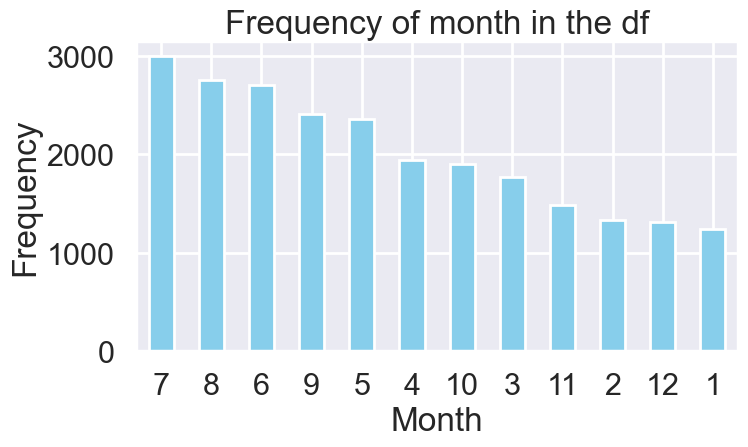

In [262]:
month_counts = df['Month'].value_counts()

plt.figure(figsize=(8, 5))
month_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of month in the df')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


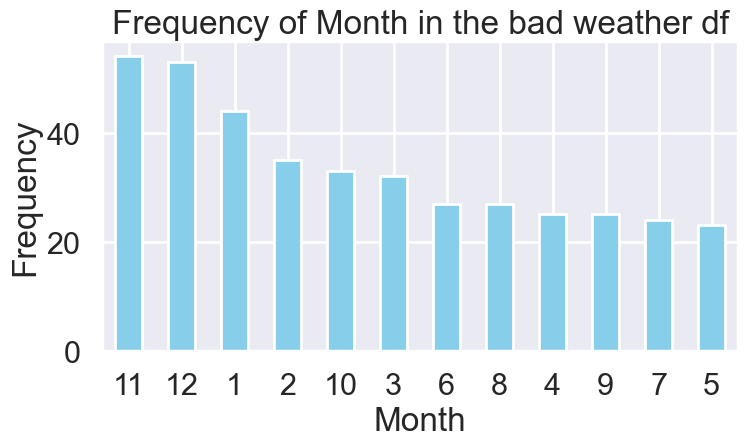

In [263]:
badweather_counts = bad_weather_df['Month'].value_counts()

# Create a bar plot to visualize the frequency of each month
plt.figure(figsize=(8, 5))
month_countss.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Month in the bad weather df')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NEW DATTAFRAME with fatal conditions

In [264]:
fatal_df = df[(df['Aircraft.damage'] == 'Destroyed') & (df['Injury.Severity'] == 'Fatal')]
fatal_df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Injured,Month
13,20020917X02134,Accident,1982-01-02,"HEARNE, TX",United States,Fatal,Destroyed,Airplane,Cessna,R172K,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Takeoff,Probable Cause,1.0,1
14,20020917X02119,Accident,1982-01-02,"CHICKASHA, OK",United States,Fatal,Destroyed,Airplane,Navion,A,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Cruise,Probable Cause,1.0,1
15,20020917X02117,Accident,1982-01-02,"LITTLE ROCK, AR",United States,Fatal,Destroyed,Airplane,Beech,19,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Cruise,Probable Cause,2.0,1
24,20020917X02255,Accident,1982-01-03,"10 NM W LEE VIN, CA",United States,Fatal,Destroyed,Airplane,Grumman,AA-5B,...,1.0,Reciprocating,Personal,NaN,0.0,IMC,Descent,Probable Cause,3.0,1
26,20020917X01720,Accident,1982-01-03,"PINEHURST, NC",United States,Fatal,Destroyed,Airplane,Beechcraft,BE-58,...,2.0,Reciprocating,Personal,NaN,0.0,IMC,Approach,Probable Cause,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88794,20221118106319,Accident,2022-11-18,"Decatur, TX",United States,Fatal,Destroyed,Airplane,Cessna,421C,...,2.0,NaN,Positioning,Regional Aviation Llc,0.0,VMC,NaN,NaN,1.0,11
88812,20221123106352,Accident,2022-11-22,"Banning, CA",United States,Fatal,Destroyed,Airplane,Gallagher,XLT-RG,...,1.0,NaN,Personal,NaN,0.0,VMC,NaN,NaN,1.0,11
88843,20221205106408,Accident,2022-12-04,"Cleburne, TX",United States,Fatal,Destroyed,Airplane,Cessna,210-5(205),...,1.0,NaN,Personal,NaN,0.0,IMC,NaN,NaN,2.0,12
88845,20221205106417,Accident,2022-12-05,"Corning, IA",United States,Fatal,Destroyed,Airplane,Engineering & Research,ERCOUPE 415-C,...,1.0,NaN,Personal,Porter Steven B,0.0,VMC,NaN,NaN,1.0,12


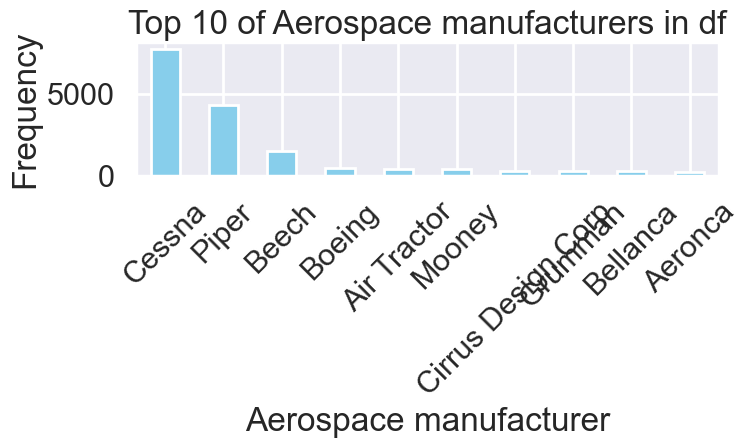

In [265]:
make_counts = df['Make'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = make_counts.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(8, 5))
top_10_make_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Aerospace manufacturer')
plt.ylabel('Frequency')
plt.title('Top 10 of Aerospace manufacturers in df')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

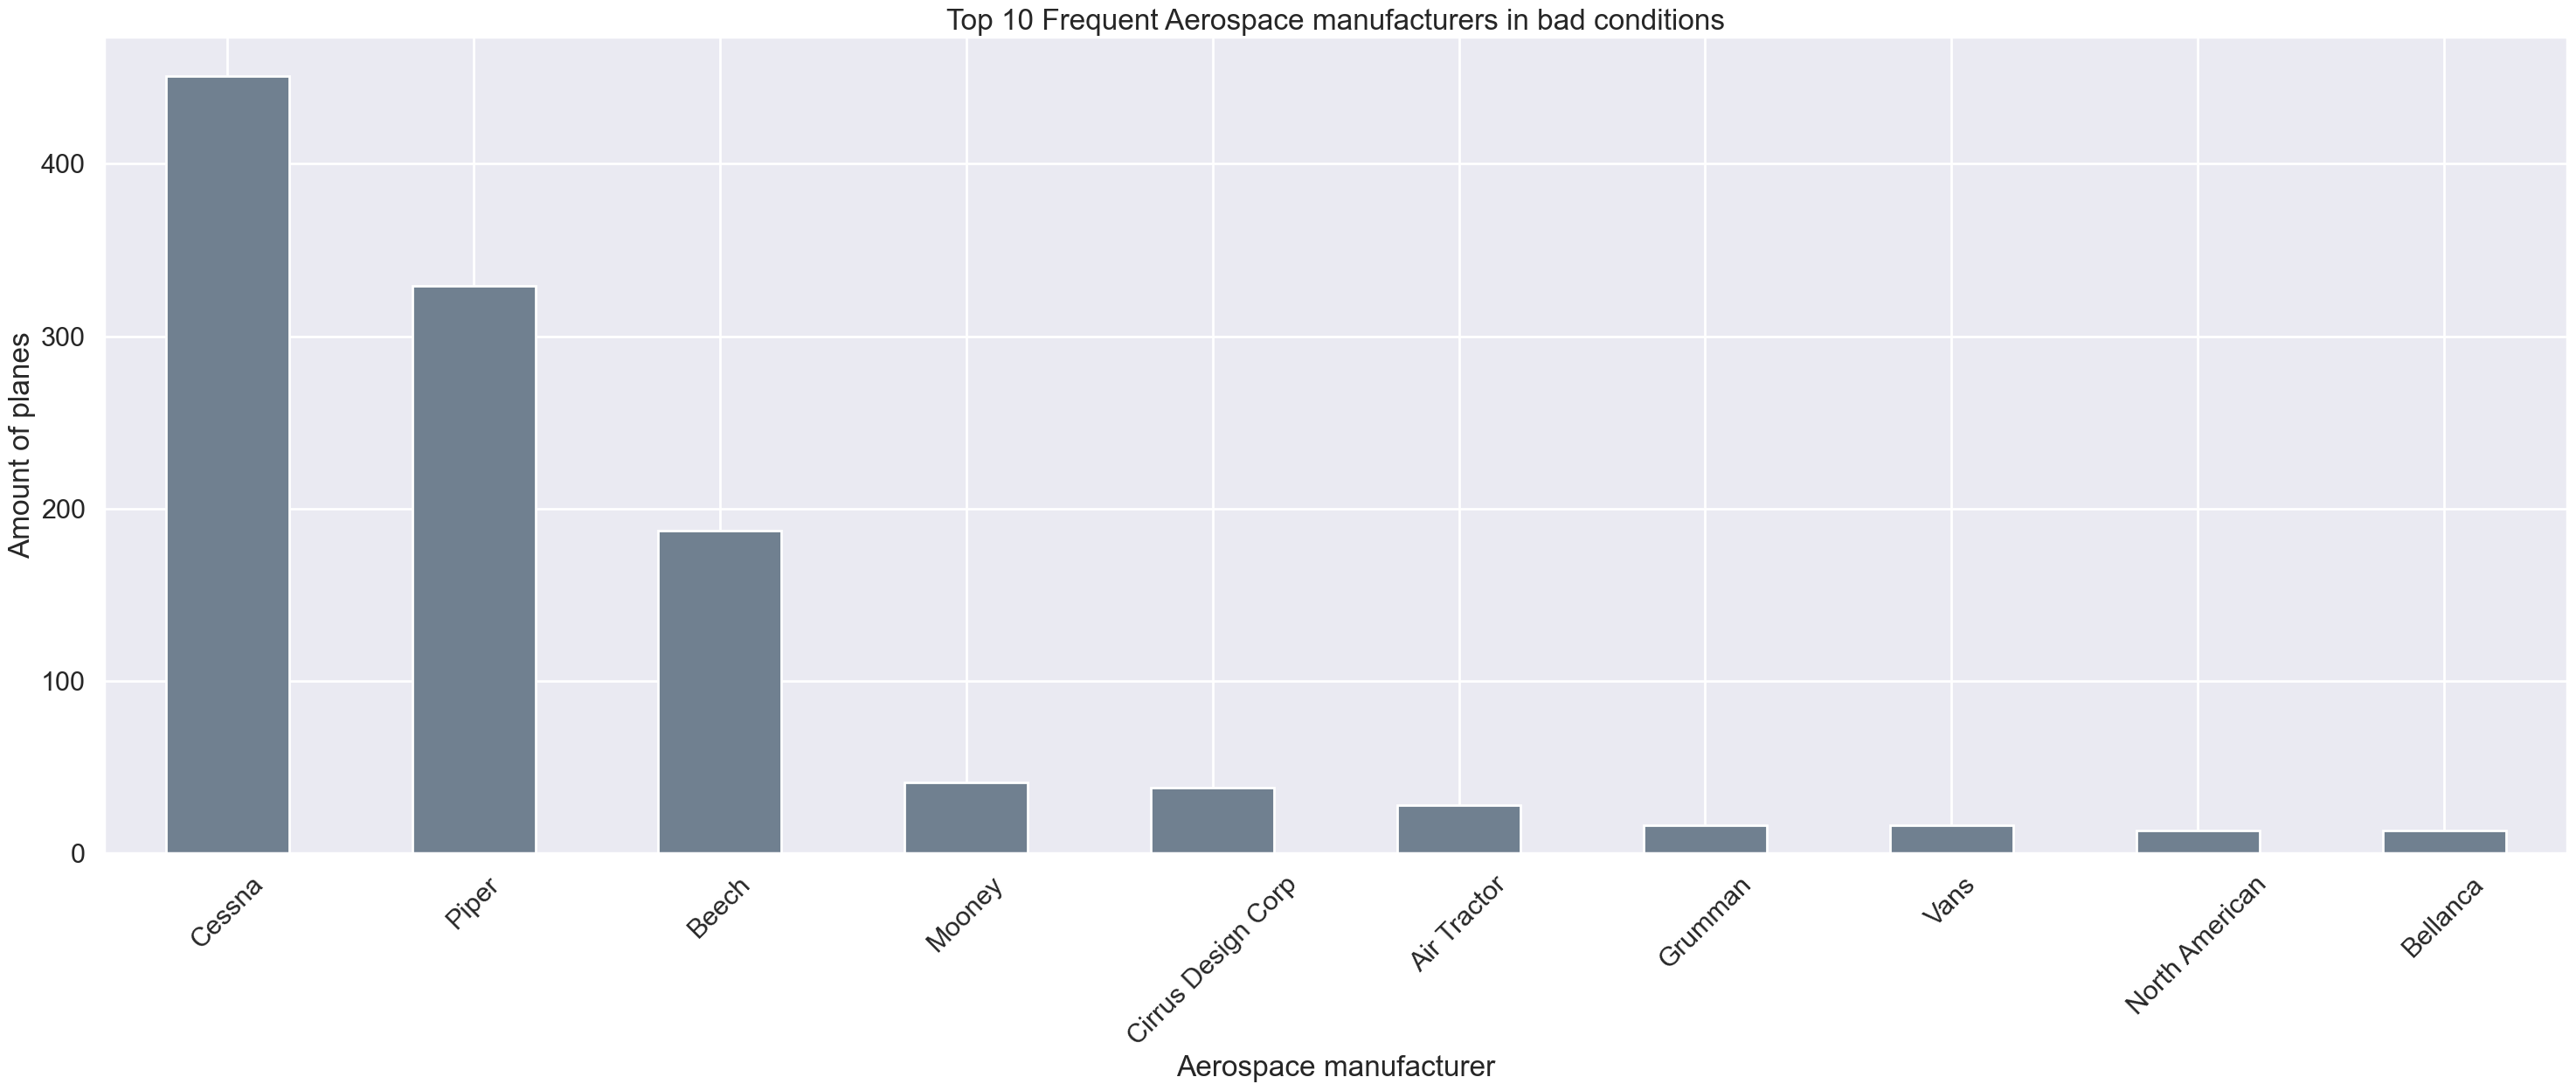

In [315]:
make_counts = fatal_df['Make'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = make_counts.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30, 13))
top_10_make_counts.plot(kind='bar', color='slategray')
plt.xlabel('Aerospace manufacturer')
plt.ylabel('Amount of planes')
plt.title('Top 10 Frequent Aerospace manufacturers in bad conditions')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

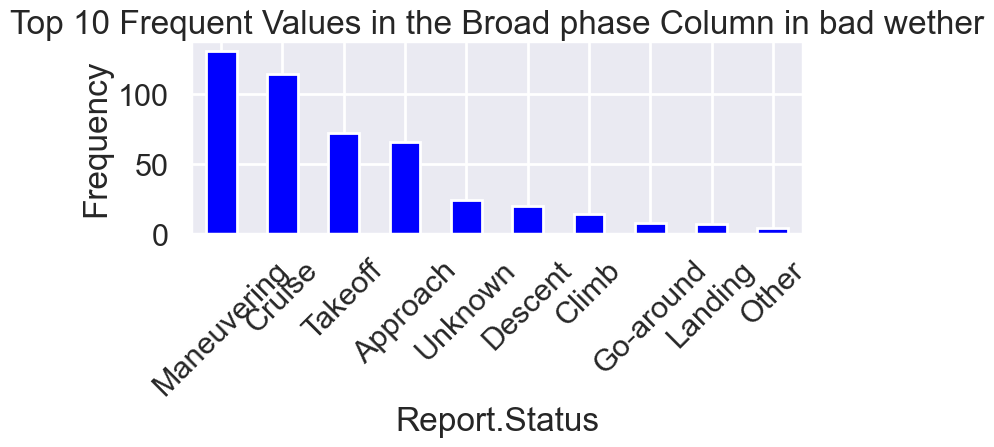

In [267]:

report_counts = fatal_df['Broad.phase.of.flight'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = report_counts.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(8, 5))
top_10_make_counts.plot(kind='bar', color='blue')
plt.xlabel('Report.Status')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Values in the Broad phase Column in bad wether')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

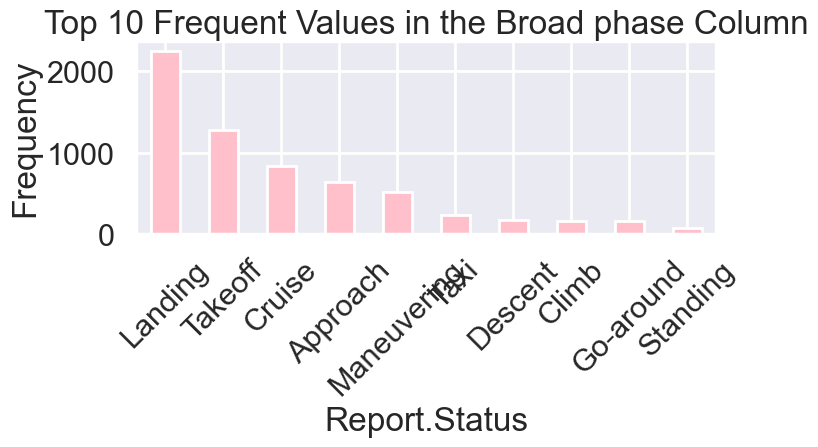

In [268]:
report_countss = df['Broad.phase.of.flight'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = report_countss.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(8, 5))
top_10_make_counts.plot(kind='bar', color='pink')
plt.xlabel('Report.Status')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Values in the Broad phase Column')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

In [269]:
# creating new df with good conditions
good_conditions_df = df[(df['Total.Uninjured'] > 10) & (df['Injury.Severity'] == 'Non-Fatal') & (df['Weather.Condition'] == 'VMC')]
good_conditions_df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Injured,Month
5,20170710X52551,Accident,1979-09-17,"BOSTON, MA",United States,Non-Fatal,Substantial,Airplane,Mcdonnell Douglas,DC9,...,2.0,Turbo Fan,NaN,Air Canada,44.0,VMC,Climb,Probable Cause,NaN,9
93,20020917X02538,Accident,1982-01-15,"JAMAICA, NY",United States,Non-Fatal,Substantial,Airplane,Swearingen,SA 226-TC,...,2.0,Turbo Prop,Unknown,Pocono Airlines,12.0,VMC,Takeoff,Probable Cause,3.0,1
336,20020917X01911,Accident,1982-02-16,"KING SALMON, AK",United States,Non-Fatal,Substantial,Airplane,Nihon,YS-11A,...,2.0,Turbo Prop,Unknown,Reeve Aleutian,36.0,VMC,Approach,Probable Cause,3.0,2
901,20020917X02079,Accident,1982-04-18,"AUSTIN, TX",United States,Non-Fatal,Substantial,Airplane,Boeing,727-200,...,3.0,Turbo Fan,Unknown,"Continental Airlines, Inc.",68.0,VMC,Landing,Probable Cause,0.0,4
1295,20020917X02737,Accident,1982-05-22,"MEMPHIS, TN",United States,Non-Fatal,NaN,Airplane,Douglas,DC-9-15F,...,2.0,Turbo Jet,Unknown,"Republic Airlines, Inc.",56.0,VMC,Descent,Probable Cause,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86831,20210927103969,Accident,2021-09-01,"Seattle, WA",United States,Non-Fatal,NaN,Airplane,Boeing,767-332,...,2.0,NaN,NaN,Delta Air Lines,37.0,VMC,NaN,NaN,2.0,9
86947,20211005104043,Accident,2021-09-23,"Honolulu, HI",United States,Non-Fatal,Substantial,Airplane,Airbus,A321-271N,...,2.0,NaN,NaN,Hawaiian Airlines Inc,134.0,VMC,NaN,NaN,0.0,9
87381,20220204104596,Incident,2022-02-04,"Las Vegas, NV",United States,Non-Fatal,Minor,Airplane,Boeing,737-8K2,...,2.0,NaN,NaN,"Sun Country Airlines, Inc.",56.0,VMC,NaN,NaN,0.0,2
87931,20220608105217,Accident,2022-06-07,"Hawthorne, CA",United States,Non-Fatal,Substantial,Airplane,Pilatus,PC12,...,1.0,NaN,Business,Western Aircraft Inc.,11.0,VMC,NaN,The multi-engine pilot's failure to maintain c...,0.0,6


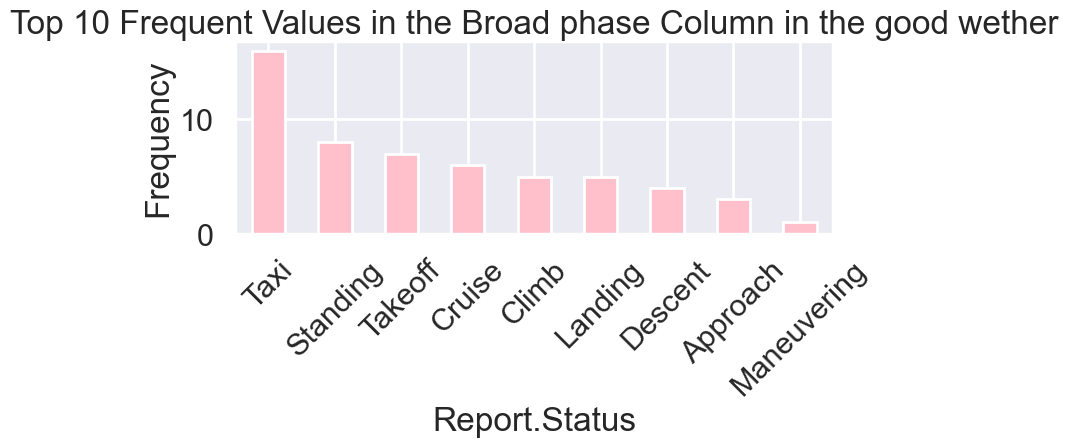

In [270]:
report_countss = good_conditions_df['Broad.phase.of.flight'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = report_countss.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(8, 5))
top_10_make_counts.plot(kind='bar', color='pink')
plt.xlabel('Report.Status')
plt.ylabel('Frequency')
plt.title('Top 10 Frequent Values in the Broad phase Column in the good wether')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

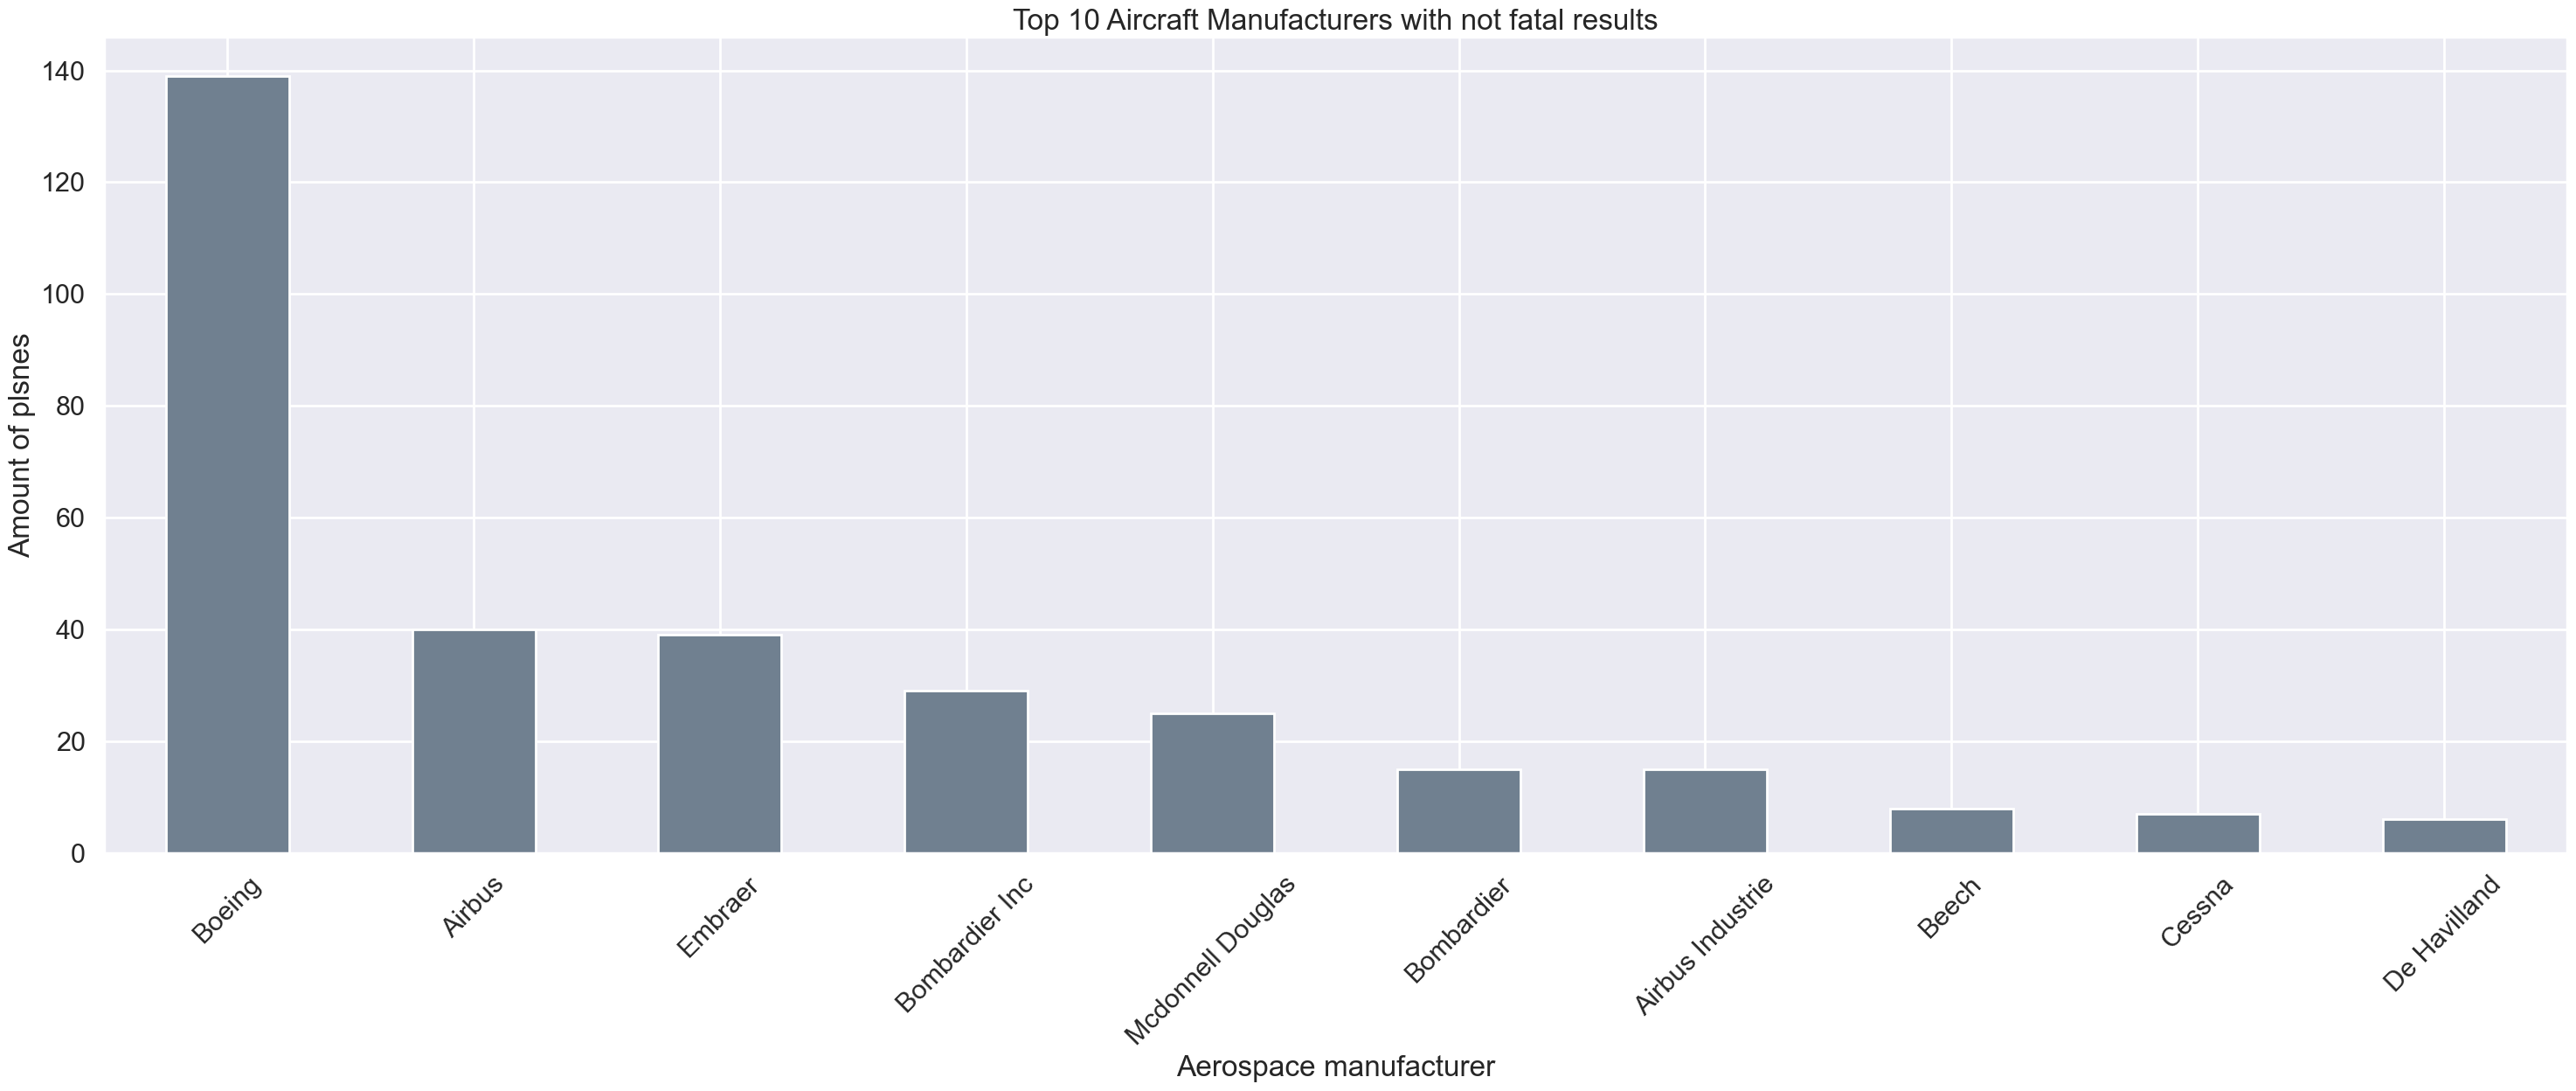

In [314]:
makes_countss = good_conditions_df['Make'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = makes_countss.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
top_10_make_counts.plot(kind='bar', color='slategray')
plt.xlabel('Aerospace manufacturer')
plt.ylabel('Amount of plsnes')
plt.title('Top 10 Aircraft Manufacturers with not fatal results')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

NameError: name 'top_10_make_counts_good' is not defined

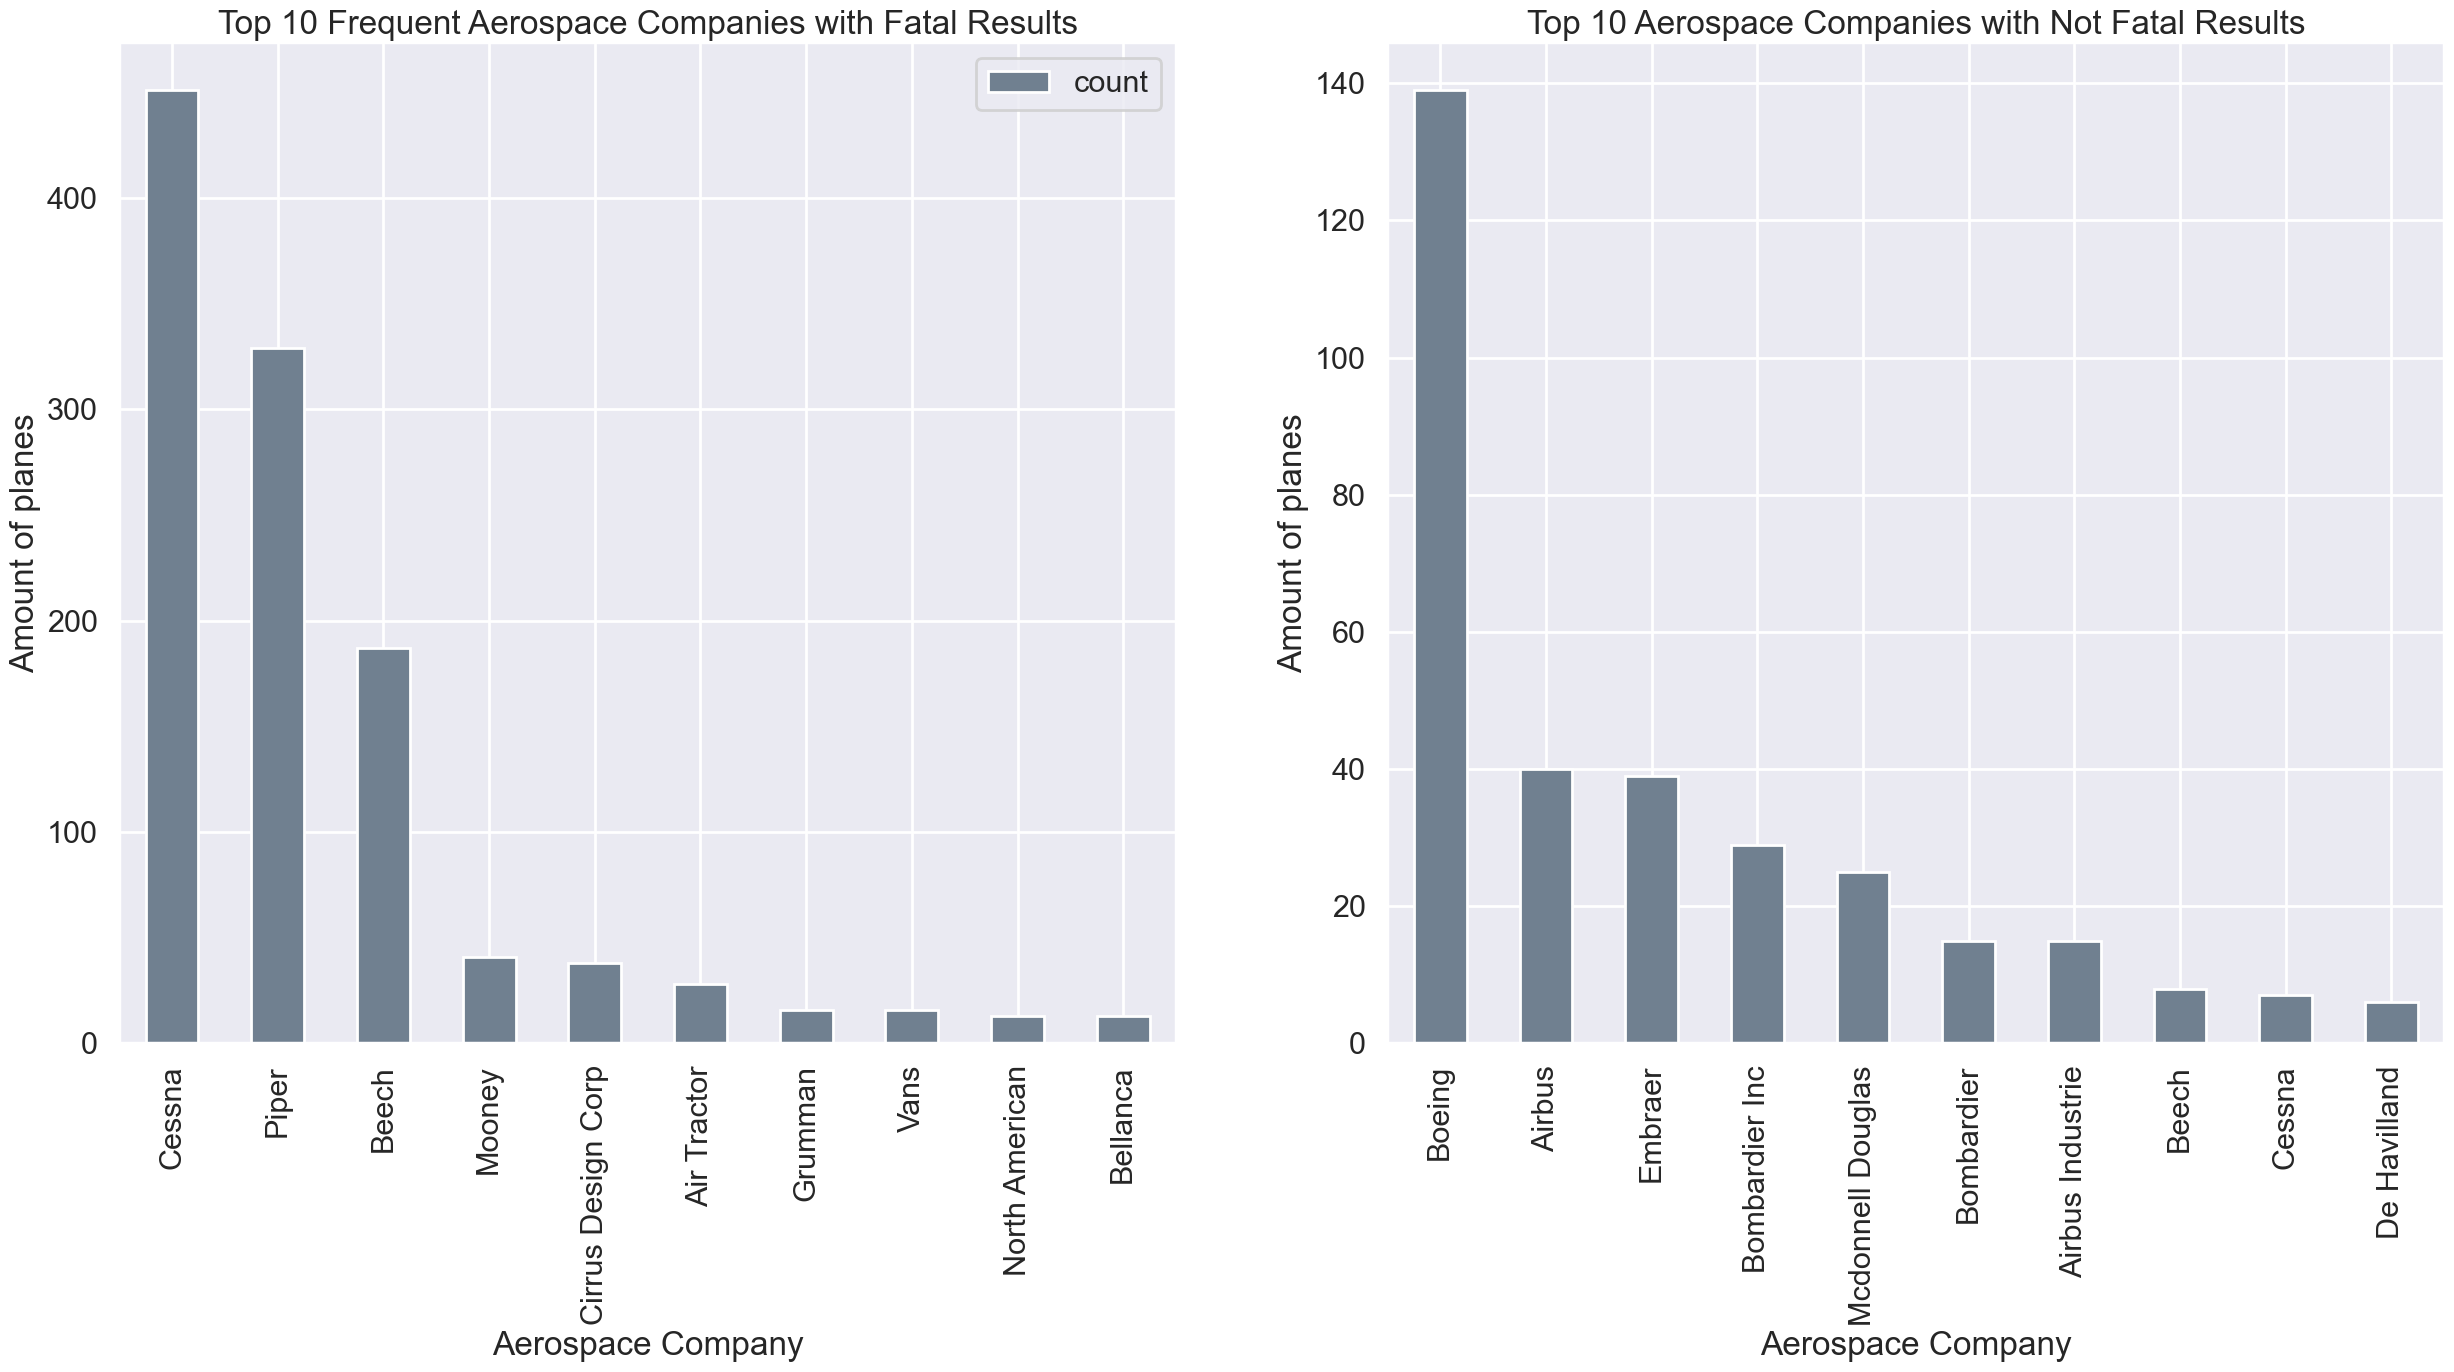

In [325]:
fig, axes = plt.subplots(1, 2, figsize=(30, 13))

# Plot the first graph (bad conditions)
make_counts = fatal_df['Make'].value_counts()
# Select the top 10 most frequent values
top_10_make_counts = make_counts.head(10)
top_10_make_counts.plot(kind='bar', color='slategray', ax=axes[0])
axes[0].set_xlabel('Aerospace Company')
axes[0].set_ylabel('Amount of planes')
axes[0].set_title('Top 10 Frequent Aerospace Companies with Fatal Results')
axes[0].set_xticklabels(top_10_make_counts.index, rotation=90)
axes[0].tick_params(axis='x', labelrotation=90)
axes[0].legend()

# Plot the second graph (not fatal results)
makes_countss = good_conditions_df['Make'].value_counts()[:10].plot(kind='bar', color='slategray', ax=axes[1])
axes[1].set_xlabel('Aerospace Company')
axes[1].set_ylabel('Amount of planes')
axes[1].set_title('Top 10 Aerospace Companies with Not Fatal Results')
axes[1].set_xticklabels(top_10_make_counts_good.index, rotation=90)
axes[1].tick_params(axis='x', labelrotation=90)
axes[1].legend()


# Adjust layout and show plots
plt.tight_layout()
plt.show()

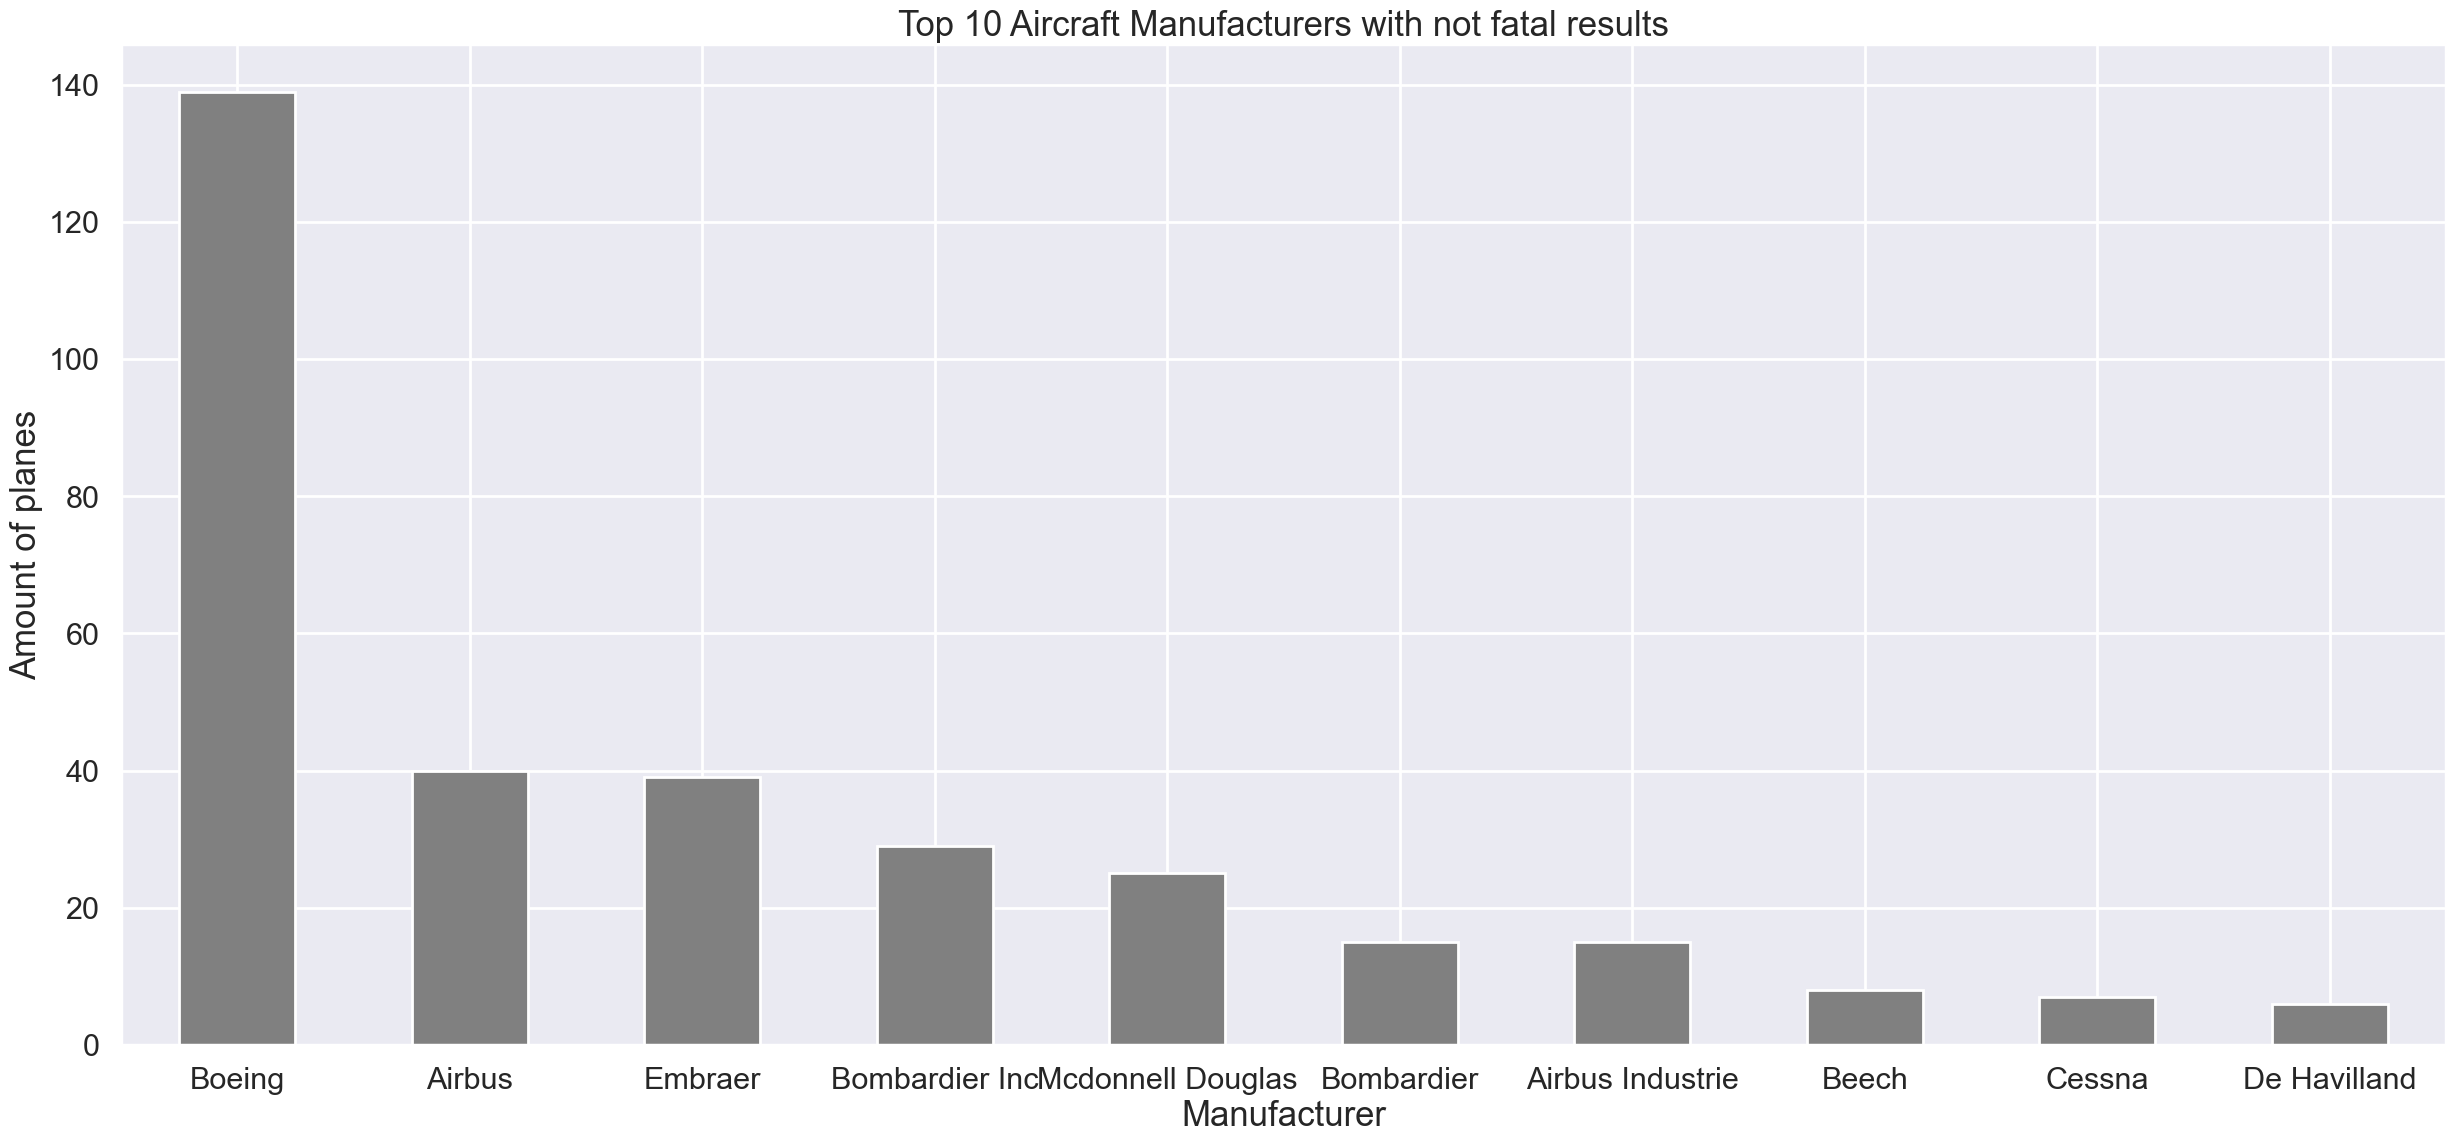

In [317]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_context('poster')
sns.set_style('darkgrid')

fig, ax = plt.subplots(figsize=(30,13))
makes_countss = good_conditions_df['Make'].value_counts()[:10].plot(kind='bar', color='grey')
plt.xticks(rotation=0)
ax.set_xlabel('Manufacturer', fontsize=25)
ax.set_ylabel('Amount of planes', fontsize=25)
ax.set_title('Top 10 Aircraft Manufacturers with not fatal results', fontsize=25);

In [273]:
#creating new data frame with only Boeing values
boeing_df = df[(df['Total.Uninjured'] > 10) & (df['Injury.Severity'] == 'Non-Fatal') & (df['Make'] == 'Boeing')]
boeing_df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Injured,Month
901,20020917X02079,Accident,1982-04-18,"AUSTIN, TX",United States,Non-Fatal,Substantial,Airplane,Boeing,727-200,...,3.0,Turbo Fan,Unknown,"Continental Airlines, Inc.",68.0,VMC,Landing,Probable Cause,0.0,4
3177,20020917X04699,Accident,1982-11-02,"AUSTIN, TX",United States,Non-Fatal,NaN,Airplane,Boeing,737-200,...,2.0,Turbo Fan,Unknown,S.W. Airlines Inc.,67.0,VMC,Climb,Probable Cause,1.0,11
3374,20020917X04910,Accident,1982-11-27,"MIAMI, FL",United States,Non-Fatal,Substantial,Airplane,Boeing,707-323C,...,4.0,Turbo Fan,Unknown,Aerotal Ltda.,116.0,VMC,Takeoff,Probable Cause,0.0,11
3447,20020917X04570,Accident,1982-12-09,"DENVER, CO",United States,Non-Fatal,NaN,Airplane,Boeing,737-291,...,2.0,Turbo Fan,Unknown,"Frontier Airlines, Inc.",57.0,VMC,Taxi,Probable Cause,0.0,12
22096,20001213X27446,Accident,1988-12-23,"Midway Islands, PO",United States,Non-Fatal,NaN,Airplane,Boeing,747SP-21,...,4.0,Turbo Fan,Unknown,United Airlines,220.0,Unk,Cruise,Probable Cause,NaN,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86968,20211001104015,Accident,2021-09-27,"Newark, NJ",United States,Non-Fatal,Substantial,Airplane,Boeing,757-224,...,2.0,NaN,NaN,United Airlines,172.0,NaN,NaN,NaN,0.0,9
87037,20211025104153,Accident,2021-10-09,"Lexington, VA",United States,Non-Fatal,NaN,Airplane,Boeing,737-8H4,...,2.0,NaN,NaN,Southwest Airlines,111.0,NaN,NaN,NaN,1.0,10
87381,20220204104596,Incident,2022-02-04,"Las Vegas, NV",United States,Non-Fatal,Minor,Airplane,Boeing,737-8K2,...,2.0,NaN,NaN,"Sun Country Airlines, Inc.",56.0,VMC,NaN,NaN,0.0,2
87407,20220217104662,Incident,2022-02-10,"Lanseria, OF",United States,Non-Fatal,Minor,Airplane,Boeing,737,...,2.0,NaN,NaN,Kulula,163.0,NaN,NaN,NaN,0.0,2


In [274]:
boeing_df['Model'] = boeing_df['Model'].replace("737 7H4", "737-7H4")
boeing_df['Model'].value_counts().head(20)

Model
737          30
737-7H4      25
767          12
757          12
777           7
737-8H4       6
737-823       5
757-222       5
737-300       5
737 3H4       4
757-232       4
737-3H4       4
737-700       4
777-222       4
717-200       3
757-223       3
747           3
737-932ER     2
737-924ER     2
757 223       2
Name: count, dtype: int64

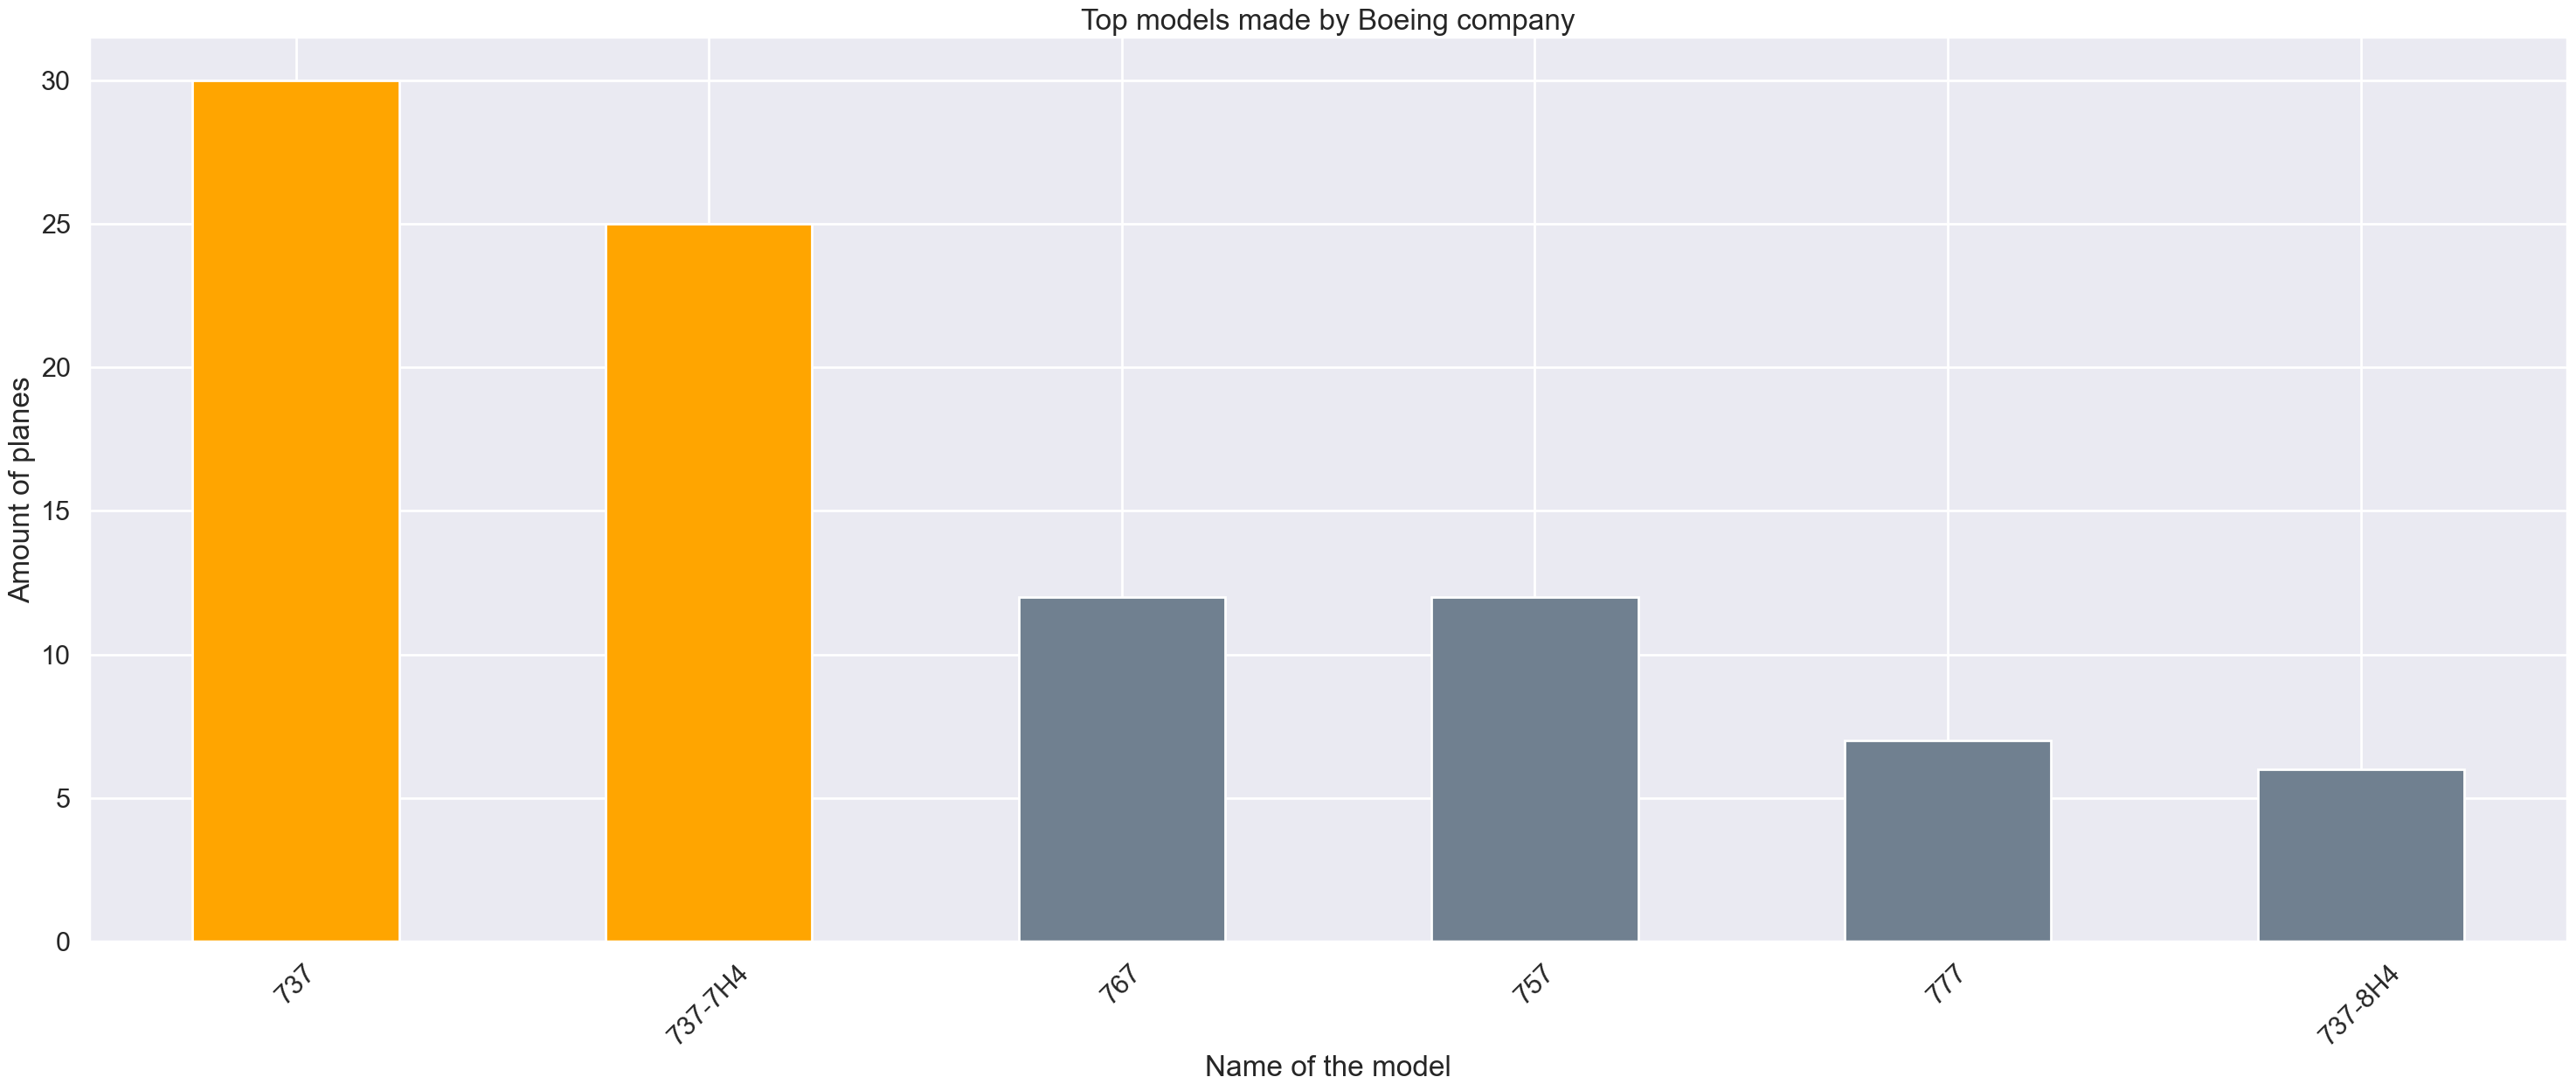

In [334]:
boeing_counts = boeing_df['Model'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = boeing_counts.head(6)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
top_10_make_counts.plot(kind='bar', color=['orange', 'orange', 'slategray', 'slategray', 'slategray','slategray'])
plt.xlabel('Name of the model')
plt.ylabel('Amount of planes')
plt.title('Top models made by Boeing company')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

In [276]:
airbus_df = df[(df['Total.Uninjured'] > 10) & (df['Injury.Severity'] == 'Non-Fatal') & (df['Make'] == 'Airbus')]

airbus_df

,Event.Id,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,...,Number.of.Engines,Engine.Type,Purpose.of.flight,Air.carrier,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Injured,Month
61671,20070426X00458,Accident,2006-11-07,"Chicago, IL",United States,Non-Fatal,Minor,Airplane,Airbus,A-320-200,...,2.0,Turbo Fan,NaN,United Airlines Inc (Dba: United Airlines),216.0,IMC,Taxi,Probable Cause,NaN,11
63991,20080514X00667,Incident,2008-01-25,"Newark, NJ",United States,Non-Fatal,NaN,Airplane,Airbus,A320,...,2.0,Turbo Fan,NaN,United Airlines Inc,107.0,VMC,NaN,a fault in the airplane's AC 1 electrical bus ...,0.0,1
65538,20081027X75039,Accident,2008-10-20,"Phoenix, AZ",United States,Non-Fatal,Substantial,Airplane,Airbus,320,...,2.0,Turbo Fan,NaN,United Airlines,162.0,VMC,NaN,The failure of the flightcrew to arrest an exc...,0.0,10
65850,20090115X73226,Accident,2009-01-15,"Weehawken, NJ",United States,Non-Fatal,Substantial,Airplane,Airbus,A320,...,2.0,Turbo Fan,NaN,Us Airways Inc,150.0,NaN,NaN,"The ingestion of large birds into each engine,...",5.0,1
66309,20090505X04553,Accident,2009-05-04,"Denver, CO",United States,Non-Fatal,Substantial,Airplane,Airbus,A320,...,2.0,Turbo Fan,NaN,Northwest Airlines Inc,150.0,VMC,NaN,The first officers excessive pitch-up of the ...,4.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86778,20210826103756,Accident,2021-08-21,"Chicago, IL",United States,Non-Fatal,NaN,Airplane,Airbus,319-132,...,NaN,NaN,NaN,American Airlines,119.0,NaN,NaN,NaN,1.0,8
86947,20211005104043,Accident,2021-09-23,"Honolulu, HI",United States,Non-Fatal,Substantial,Airplane,Airbus,A321-271N,...,2.0,NaN,NaN,Hawaiian Airlines Inc,134.0,VMC,NaN,NaN,0.0,9
86995,20211004104029,Incident,2021-10-02,"Atlantic City, NJ",United States,Non-Fatal,Minor,Airplane,Airbus,A320-271N,...,2.0,NaN,NaN,Spirit Airlines,108.0,NaN,NaN,NaN,4.0,10
87346,20220124104551,Accident,2022-01-22,"Hayden, CO",United States,Non-Fatal,Substantial,Airplane,Airbus,A320-232,...,2.0,NaN,NaN,Jetblue Airways Corp,108.0,NaN,NaN,NaN,0.0,1


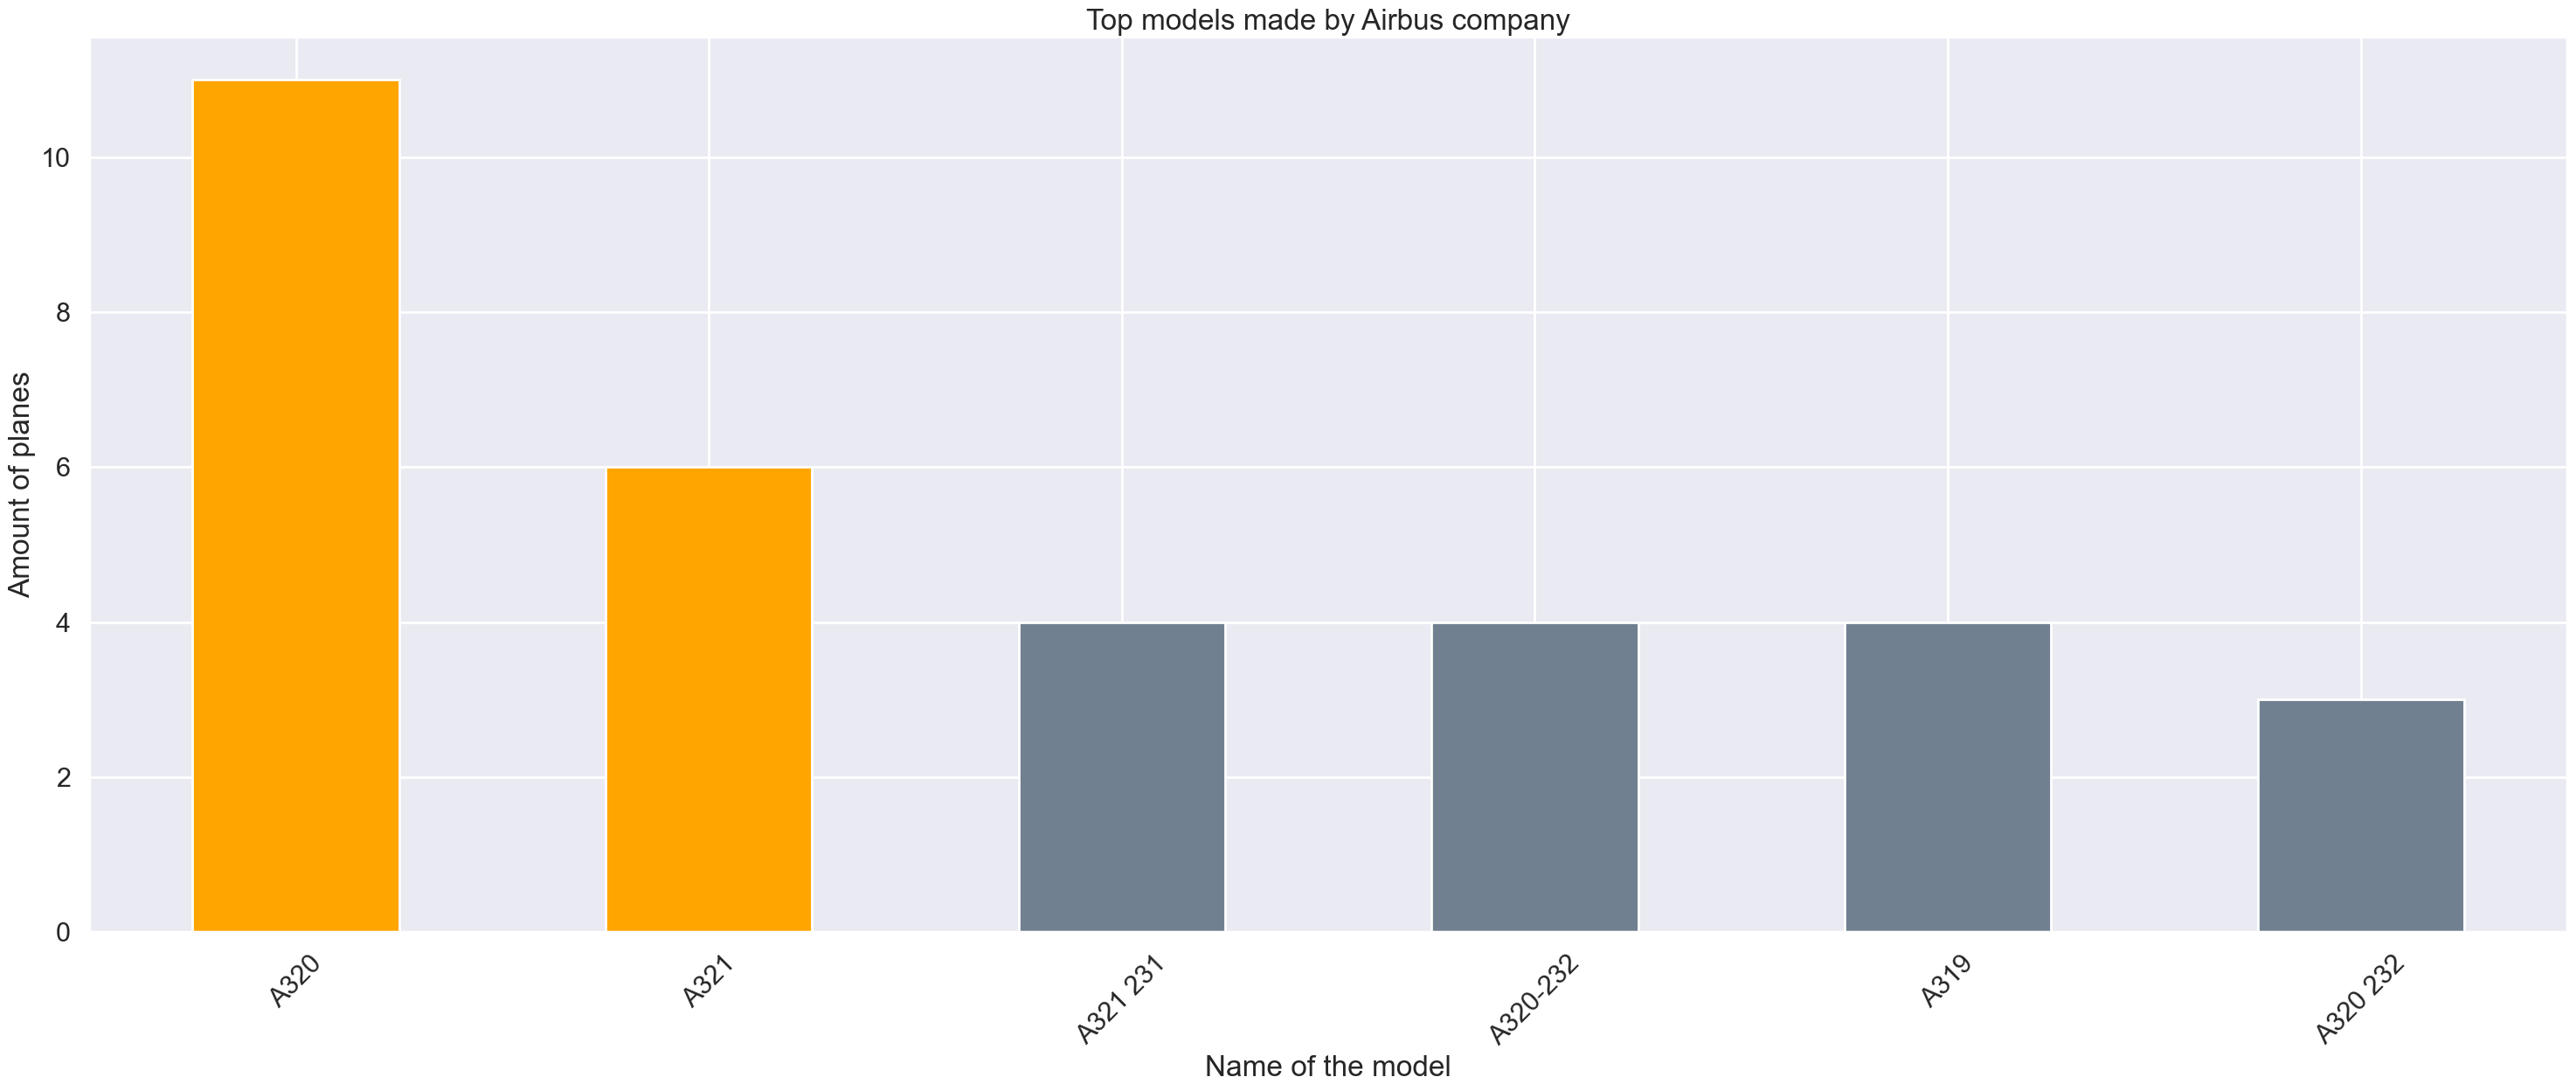

In [335]:
airbus_counts = airbus_df['Model'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = airbus_counts.head(6)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
top_10_make_counts.plot(kind='bar', color= ['orange', 'orange', 'slategray', 'slategray', 'slategray','slategray'])
plt.xlabel('Name of the model')
plt.ylabel('Amount of planes')
plt.title('Top models made by Airbus company')
plt.xticks(rotation=45)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

In [279]:
airbus_df['Number.of.Engines'].value_counts()
airbus_df['Engine.Type'].value_counts()

Engine.Type
Turbo Fan    47
Name: count, dtype: int64

In [280]:
boeing_df['Number.of.Engines'].value_counts()
boeing_df['Engine.Type'].value_counts()

Engine.Type
Turbo Fan     157
Turbo Jet      16
Turbo Prop      1
Unknown         1
Name: count, dtype: int64

In [281]:
##Recommend having alternate flight routes and airports in mind for situations where certain routes may be affected by extreme weather conditions.
#Provide strategies for diversions and reroutes that prioritize passenger and crew safety.
#Suggest adjusting flight schedules to avoid peak winter weather conditions. This might involve optimizing flight times to minimize exposure to the most dangerous weather.
#Encourage spacing out flight schedules to allow for otential delays caused by winter conditions.

In [282]:
df['Air.carrier'].value_counts()

Air.carrier
Pilot                                      225
Southwest Airlines                          62
Delta Air Lines                             54
American Airlines                           48
United Airlines                             41
                                          ... 
Arthur Hale Consulting/Instruction, Llc      1
Frederick P. Fiala                           1
Morris Kenneth E                             1
Taa Flight Training                          1
Gerber Richard E                             1
Name: count, Length: 8206, dtype: int64

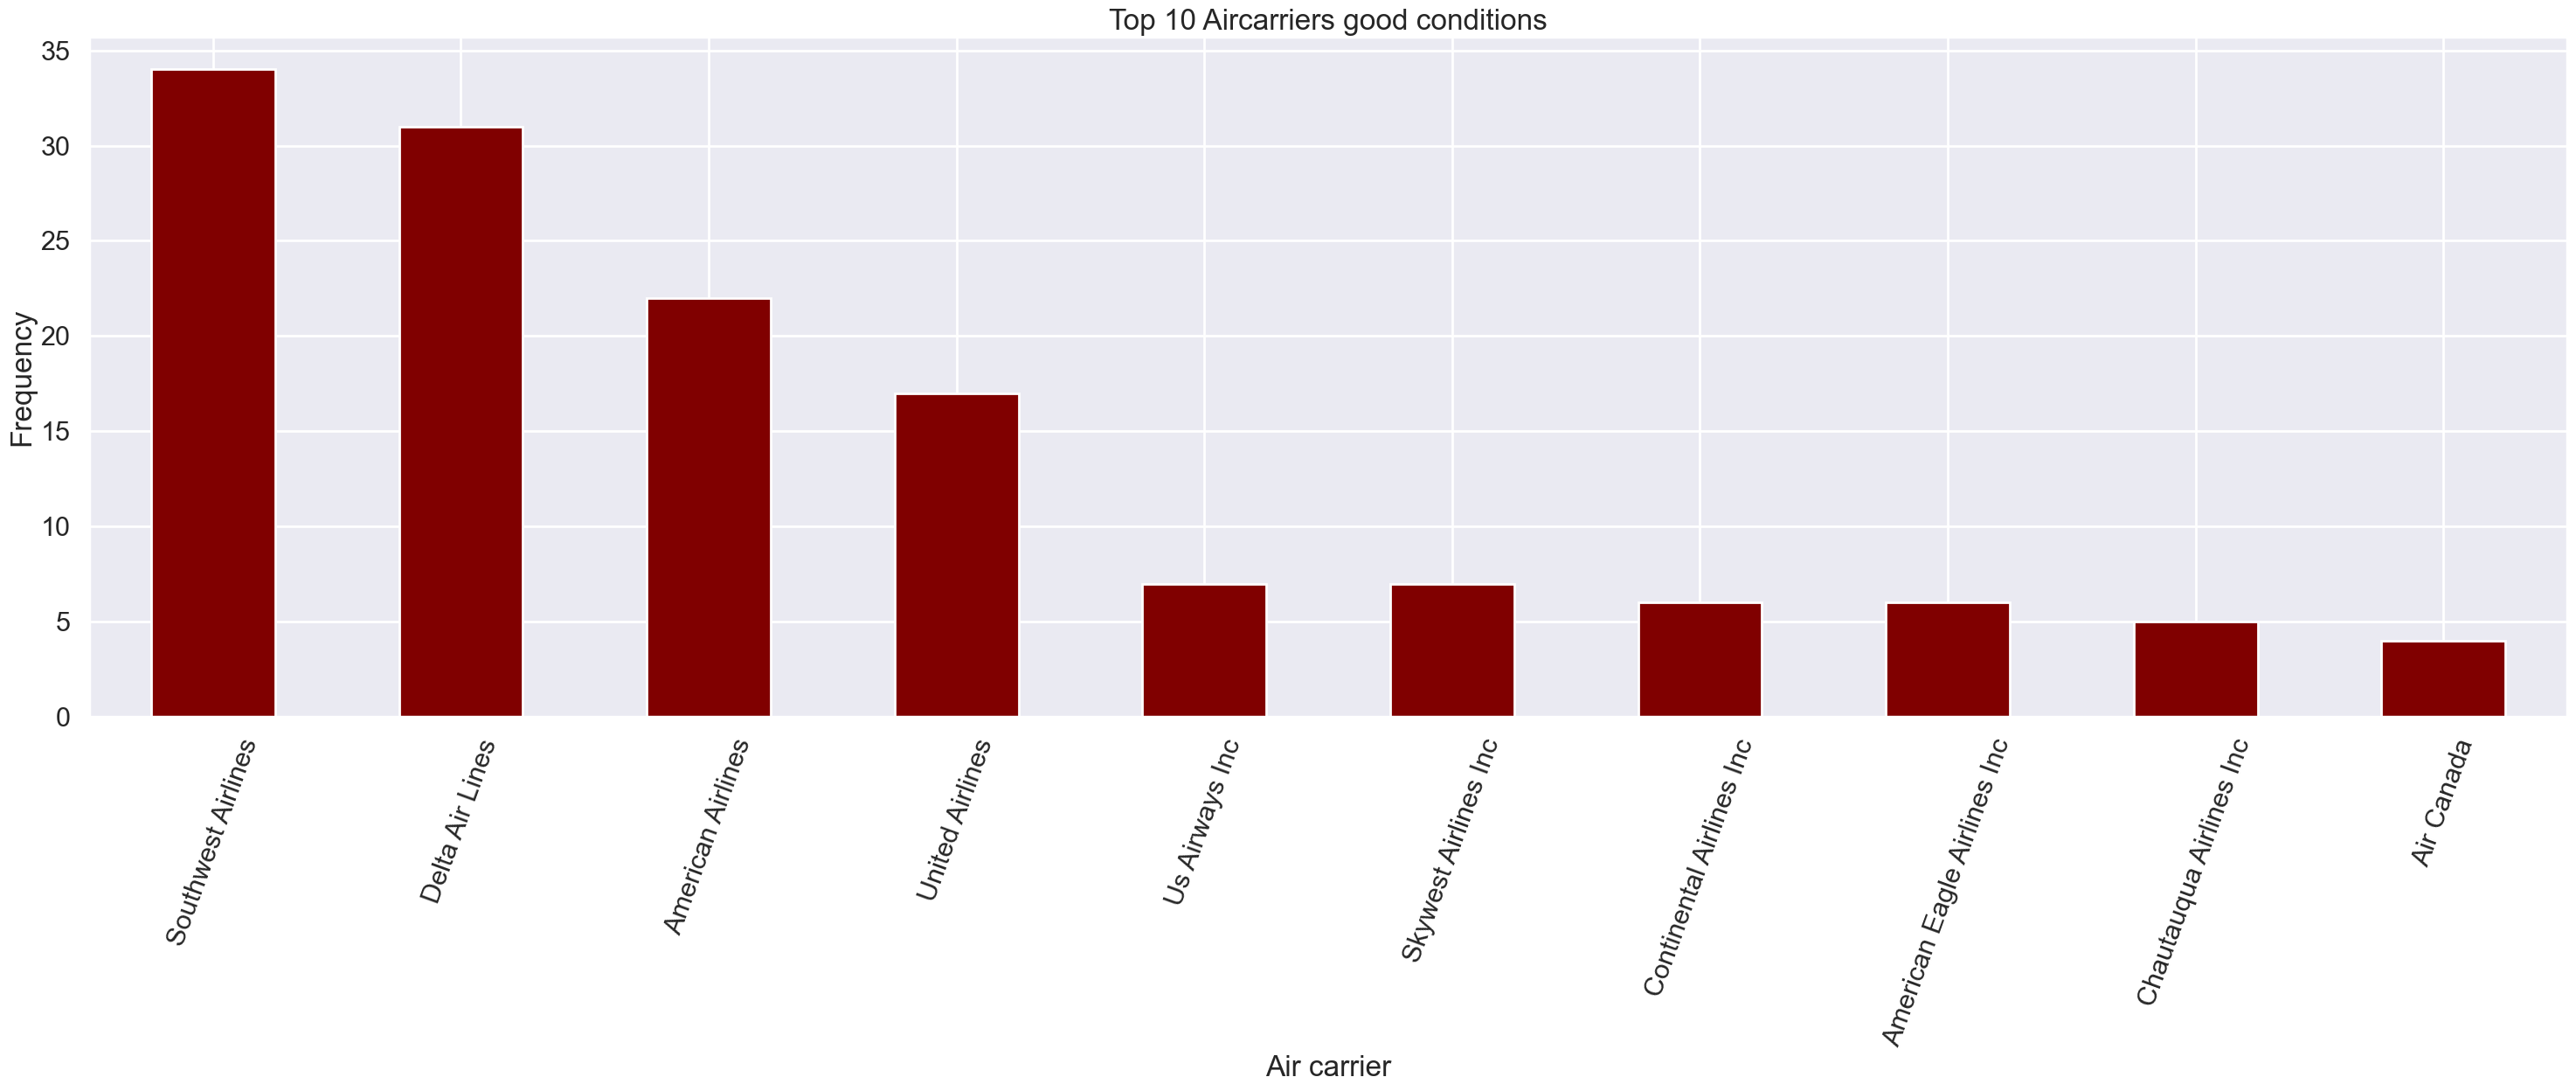

In [337]:
bad_countss = good_conditions_df['Air.carrier'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = bad_countss.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30, 13))
top_10_make_counts.plot(kind='bar', color='maroon')
plt.xlabel('Air carrier')
plt.ylabel('Frequency')
plt.title('Top 10 Aircarriers good conditions')
plt.xticks(rotation=70)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

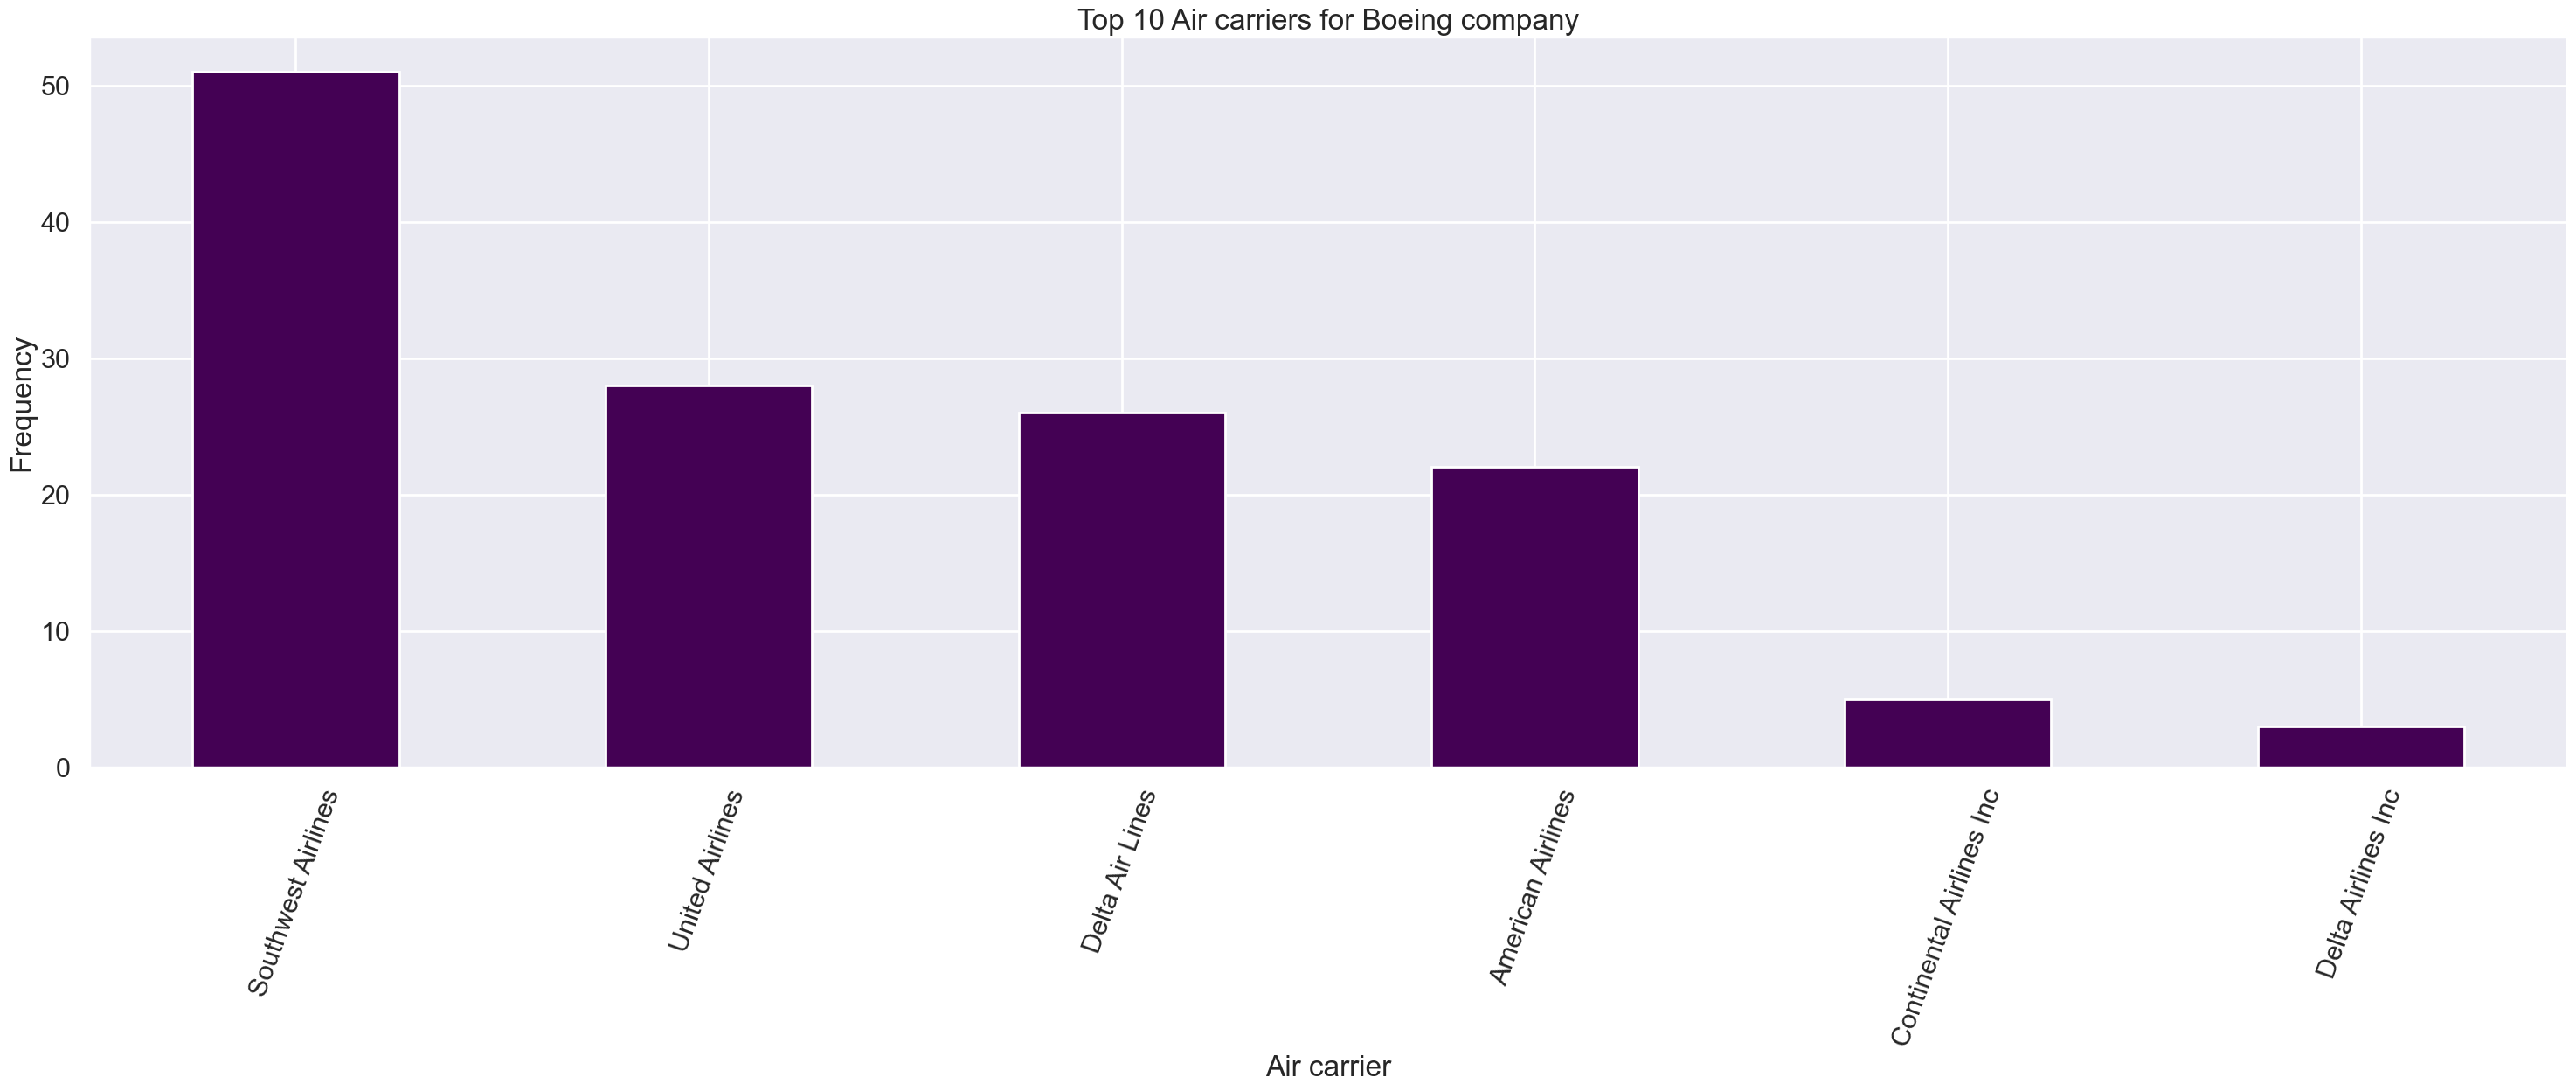

In [350]:
boeing_carrier = boeing_df['Air.carrier'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = boeing_carrier.head(6)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30, 13))
top_10_make_counts.plot(kind='bar', colormap='viridis')
plt.xlabel('Air carrier')
plt.ylabel('Frequency')
plt.title('Top 10 Air carriers for Boeing company')
plt.xticks(rotation=70)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

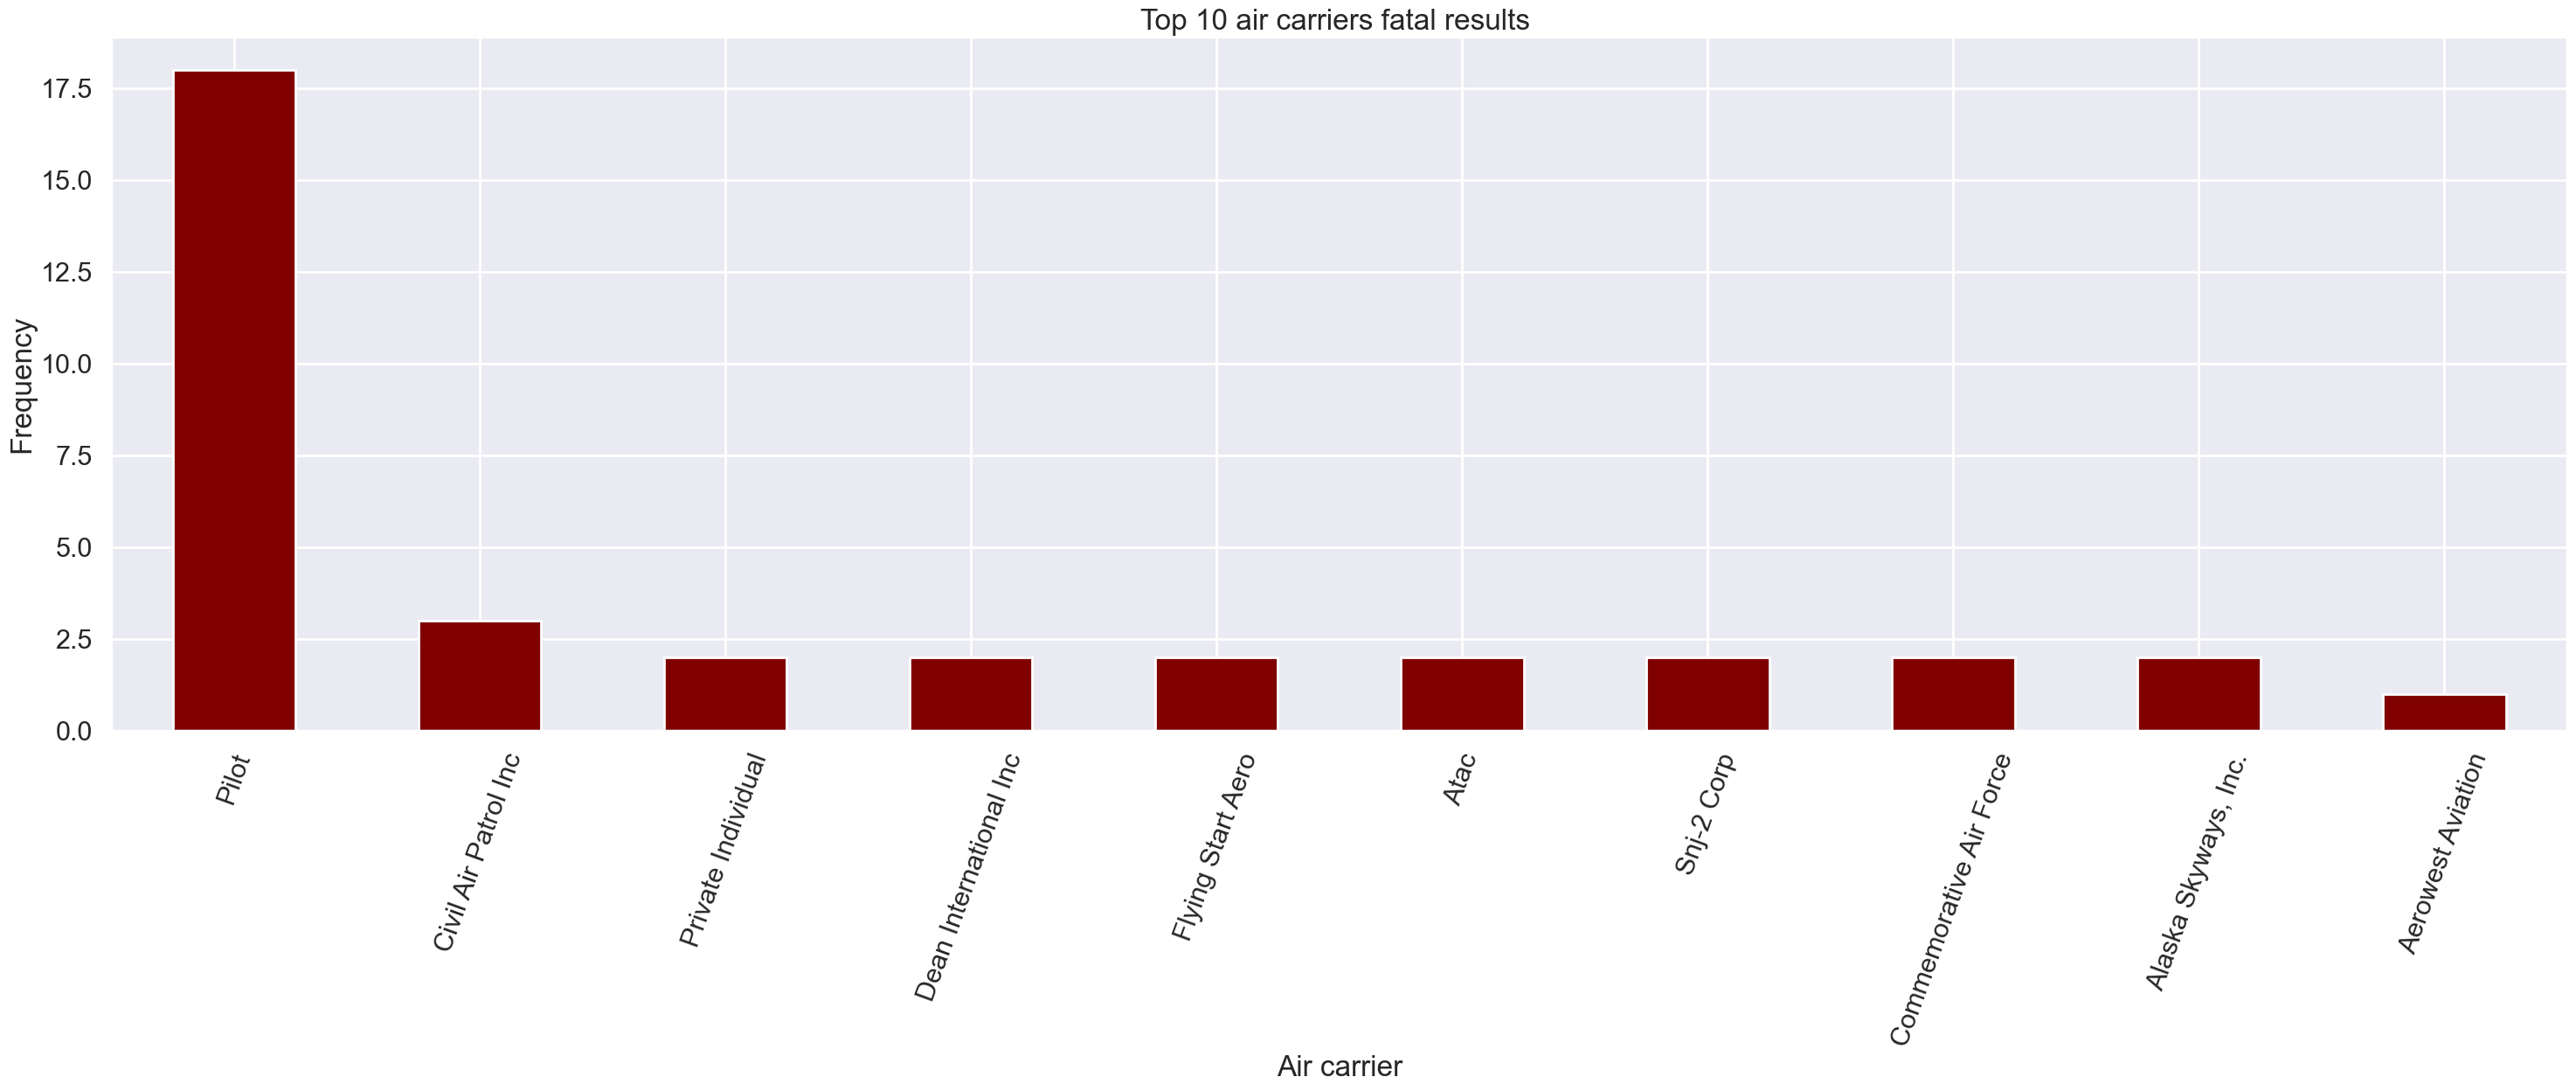

In [338]:
good_countss = fatal_df['Air.carrier'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts = good_countss.head(10)

# Create a bar plot to visualize the frequency of the top 10 'Make' values
plt.figure(figsize=(30,13))
top_10_make_counts.plot(kind='bar', color='maroon')
plt.xlabel('Air carrier')
plt.ylabel('Frequency')
plt.title('Top 10 air carriers fatal results ')
plt.xticks(rotation=70)  # Rotate the x-axis labels by 45 degrees
plt.tight_layout()
plt.show()

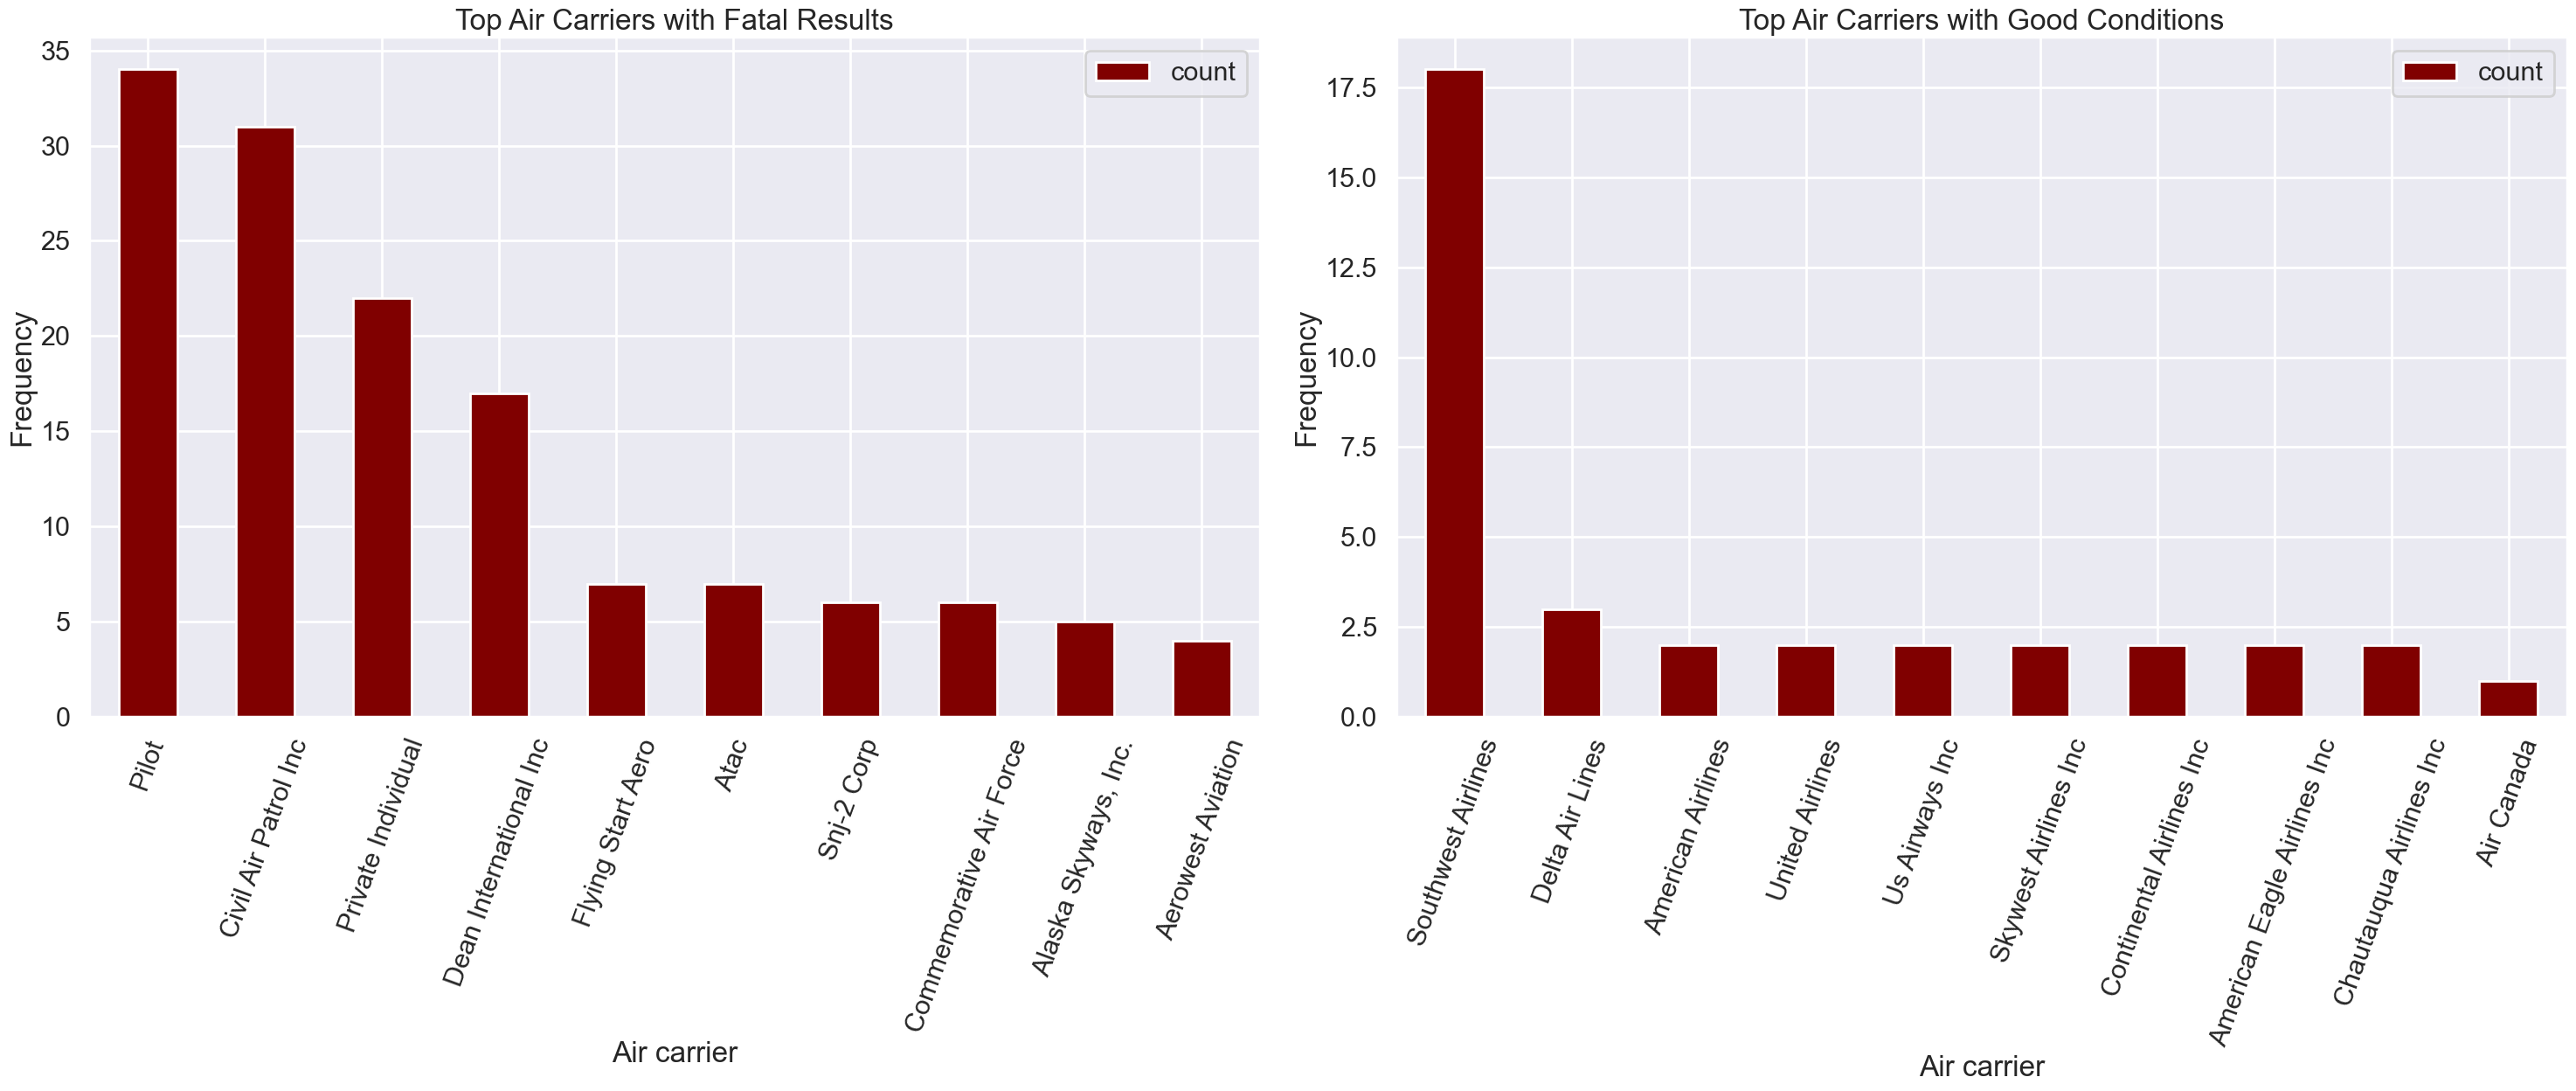

In [346]:

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(30, 13))

good_countss = good_conditions_df['Air.carrier'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts_good = good_countss.head(10)
# Plot the first graph (fatal results)
top_10_make_counts_good.plot(kind='bar', color='maroon', ax=axes[0])
axes[0].set_xlabel('Air carrier')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Top Air Carriers with Fatal Results')
axes[0].set_xticklabels(top_10_make_counts.index, rotation=70)
axes[0].tick_params(axis='x', labelrotation=70)
axes[0].legend()


bad_countss = fatal_df['Air.carrier'].value_counts()

# Select the top 10 most frequent values
top_10_make_counts_bad = bad_countss.head(10)

# Plot the second graph (good conditions)
top_10_make_counts_bad.plot(kind='bar', color='maroon', ax=axes[1])
axes[1].set_xlabel('Air carrier')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Top Air Carriers with Good Conditions')
axes[1].set_xticklabels(top_10_make_counts_good.index, rotation=70)
axes[1].tick_params(axis='x', labelrotation=70)
axes[1].legend()

# Adjust layout and show plots
plt.tight_layout()
plt.show()